# Flatiron Modeling Pipeline — Data Exploration

Initial notebook to load the core dataset and perform a quick health check.

In [20]:
%load_ext autoreload
%autoreload 2

import io
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.utilities as util
import src.featureeng as fe

# SECTION_DIVIDER = '=' * 40
# SUB_SECTION_DIVIDER = '-' * 40

# def print_heading(title: str):
#     """Print a visually distinct major section header."""
#     print(f"\n{SECTION_DIVIDER}\n{title}\n{SECTION_DIVIDER}\n")

# def print_sub_heading(title: str):
#     """Print a visually distinct sub-section header."""
#     print(f"\n{SUB_SECTION_DIVIDER}\n{title}\n{SUB_SECTION_DIVIDER}\n")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# DATA_PATH = 'data/Dataset.csv'

# print_heading('Loading Raw Dataset')
# print(f'Reading dataset from: {DATA_PATH}')
# df = pd.read_csv(DATA_PATH)
# print(f'Dataset loaded successfully with {len(df):,} rows and {len(df.columns)} columns.')
df = util.load_raw_data()

util.print_heading('Original Data Overview')

util.print_sub_heading('Data Head (First 5 Rows)')
pd.set_option('display.max_columns', None)
display(df.head())
pd.reset_option('display.max_columns')

util.print_sub_heading('Dataset Info (Schema & Non-Null Counts)')
buffer = io.StringIO()
df.info(buf=buffer)
print(buffer.getvalue())

util.print_sub_heading('Null Value Counts (Absolute)')
display(df.isnull().sum())

util.print_sub_heading('Descriptive Statistics (Numeric Columns)')
display(df.describe())

util.print_heading('Category Distribution Overview')
util.print_sub_heading('from_category Value Counts')
display(df['from_category'].value_counts(dropna=False))

util.print_sub_heading('to_category Value Counts')
display(df['to_category'].value_counts(dropna=False))



Loading Raw Dataset

Reading dataset from: data/Dataset.csv
Dataset loaded successfully with 71,250 rows and 18 columns.

Original Data Overview


----------------------------------------
Data Head (First 5 Rows)
----------------------------------------



,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,receipt_gas_used,block_timestamp,block_number,block_hash,from_scam,to_scam,from_category,to_category
0,0x253ec84729f5c11437f5346830e6bdc9857171b16097...,370394,4,0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0,0xd707ac0098599006f0857e8da4c950795645ba01,1.800000e+18,30000,2.205000e+10,0x,129358,21000,2017-10-16 05:26:53 UTC,4370008,0x5e14d30d2155c0cdd65044d7e0f296373f3e92f65ebd...,0,0,NaN,NaN
1,0xfa5f1d7715562adb1e408fdbbbbfc033ae4fadca1e07...,229082,85,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xb8f6e76d34d4877732dfefa6b6a4e2a834a9092b,7.500000e+15,90000,2.060947e+10,0x,5415387,21000,2017-10-16 05:28:49 UTC,4370014,0x900efe010b41b8b6b135db041422fac80b69b96d93c2...,0,0,NaN,NaN
2,0x37928f1d12ee769d0876695aaa815c13d705f8b1e376...,229095,31,0x304cc179719bc5b05418d6f7f6783abe45d83090,0x5ec492652d7b92421680f21169ff6a8dbbc622ab,7.500000e+15,90000,2.060947e+10,0x,1369625,21000,2017-10-16 05:29:19 UTC,4370015,0xfe7d1bc1c6257f92bacb0f8b1266c9894dda99b42e78...,0,0,NaN,NaN
3,0xaad886f331a2fb40495cdf5faa10882852fcd324f064...,229126,78,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xdf01b231b53d8b4cbb1b092a8dc86730cebf4aa9,7.500000e+15,90000,2.060947e+10,0x,2464655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN
4,0x3dbe36fd1a1b01b5e1b343ff78ec1ec189feee5acf46...,229131,83,0x304cc179719bc5b05418d6f7f6783abe45d83090,0xaa4b9693c54029d180134161cc99e98b76cea249,7.500000e+15,90000,2.060947e+10,0x,2569655,21000,2017-10-16 05:29:43 UTC,4370016,0x1d132e9cd35e9e2cf8350258401b43474772eb1904f1...,0,0,NaN,NaN



----------------------------------------
Dataset Info (Schema & Non-Null Counts)
----------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71250 entries, 0 to 71249
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hash                         71250 non-null  object 
 1   nonce                        71250 non-null  int64  
 2   transaction_index            71250 non-null  int64  
 3   from_address                 71250 non-null  object 
 4   to_address                   71250 non-null  object 
 5   value                        71250 non-null  float64
 6   gas                          71250 non-null  int64  
 7   gas_price                    71250 non-null  float64
 8   input                        71250 non-null  object 
 9   receipt_cumulative_gas_used  71250 non-null  int64  
 10  receipt_gas_used             71250 non-null  int64  
 11  block_ti

hash                               0
nonce                              0
transaction_index                  0
from_address                       0
to_address                         0
value                              0
gas                                0
gas_price                          0
input                              0
receipt_cumulative_gas_used        0
receipt_gas_used                   0
block_timestamp                    0
block_number                       0
block_hash                         0
from_scam                          0
to_scam                            0
from_category                  68622
to_category                    59601
dtype: int64


----------------------------------------
Descriptive Statistics (Numeric Columns)
----------------------------------------



,nonce,transaction_index,value,gas,gas_price,receipt_cumulative_gas_used,receipt_gas_used,block_number,from_scam,to_scam
count,7.125000e+04,71250.000000,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,7.125000e+04,71250.000000,71250.000000
mean,3.078713e+05,72.694035,1.002473e+19,6.834562e+04,3.449287e+10,2.946858e+06,2.627084e+04,5.209526e+06,0.036884,0.163495
std,9.978455e+05,64.650247,2.858156e+20,1.335602e+05,1.250177e+11,2.444175e+06,5.131794e+04,7.509279e+05,0.188479,0.369819
min,0.000000e+00,0.000000,0.000000e+00,2.100000e+04,1.000000e+00,2.100000e+04,2.100000e+04,4.370008e+06,0.000000,0.000000
25%,3.000000e+00,21.000000,2.490000e+16,2.100000e+04,8.000000e+09,7.744545e+05,2.100000e+04,4.900821e+06,0.000000,0.000000
50%,8.500000e+01,56.000000,2.480000e+17,3.500000e+04,2.000000e+10,2.338859e+06,2.100000e+04,5.067095e+06,0.000000,0.000000
75%,7.515425e+04,109.000000,1.500000e+18,9.000000e+04,5.060947e+10,4.820330e+06,2.100000e+04,5.285231e+06,0.000000,0.000000
max,1.372920e+07,379.000000,6.000000e+22,9.344755e+06,3.000000e+13,9.991824e+06,6.787079e+06,9.185954e+06,1.000000,1.000000



Category Distribution Overview


----------------------------------------
from_category Value Counts
----------------------------------------



from_category
NaN         68622
Scamming     1402
Phishing     1225
Fake ICO        1
Name: count, dtype: int64


----------------------------------------
to_category Value Counts
----------------------------------------



to_category
NaN         59601
Scamming     9758
Phishing     1891
Name: count, dtype: int64

### Original Ethereum Transaction Data — Feature Dictionary

| Field | Type | Meaning | Use | Notes |
|---|---|---|---|---|
| hash | string | Unique transaction hash | context | Not modeled directly; can be used as row ID |
| nonce | int | Per-sender transaction count at time of tx | dropped | Not used in current feature set |
| transaction_index | int | Position of tx within block | dropped | Block-local ordering only |
| from_address | string | Sender address | analysis | Used as key to build per-address features |
| to_address | string | Recipient address | analysis | Used as key to build per-address features |
| value | float | Transferred ETH amount in wei | analysis | Aggregated into incoming/outgoing amount features |
| gas | int | Gas limit specified for tx | analysis | Used for avg gas limit per address |
| gas_price | float | Gas price offered (wei per gas unit) | analysis | Used for avg gas price per address |
| input | string | Hex calldata / payload | dropped | Not parsed in this project |
| receipt_cumulative_gas_used | int | Total gas used in block up to this tx | dropped | Not used in current features |
| receipt_gas_used | int | Gas used by this tx alone | dropped | Redundant with other gas behavior for this analysis |
| block_timestamp | string → datetime | Block time for tx | analysis | Parsed to UTC; basis for all time/sequence features |
| block_number | int | Block height containing tx | dropped | Highly collinear with timestamp; not modeled directly |
| block_hash | string | Hash of containing block | dropped | Not used in current features |
| from_scam | int (0/1) | Source is labeled scam address | analysis | Used to construct per-address Scam label |
| to_scam | int (0/1) | Destination is labeled scam address | analysis | Used to construct per-address Scam label |
| from_category | string | Labeled category for sender | analysis | Used to flag scam/fraud/phish categories |
| to_category | string | Labeled category for recipient | analysis | Used to flag scam/fraud/phish categories |


----------------------------------------
Correlation Heatmap (Pure Numeric Features Only)
----------------------------------------

Label columns (Scam, from_scam, to_scam) are excluded to avoid inflated or misleading correlations. This map focuses only on real numeric feature interactions.


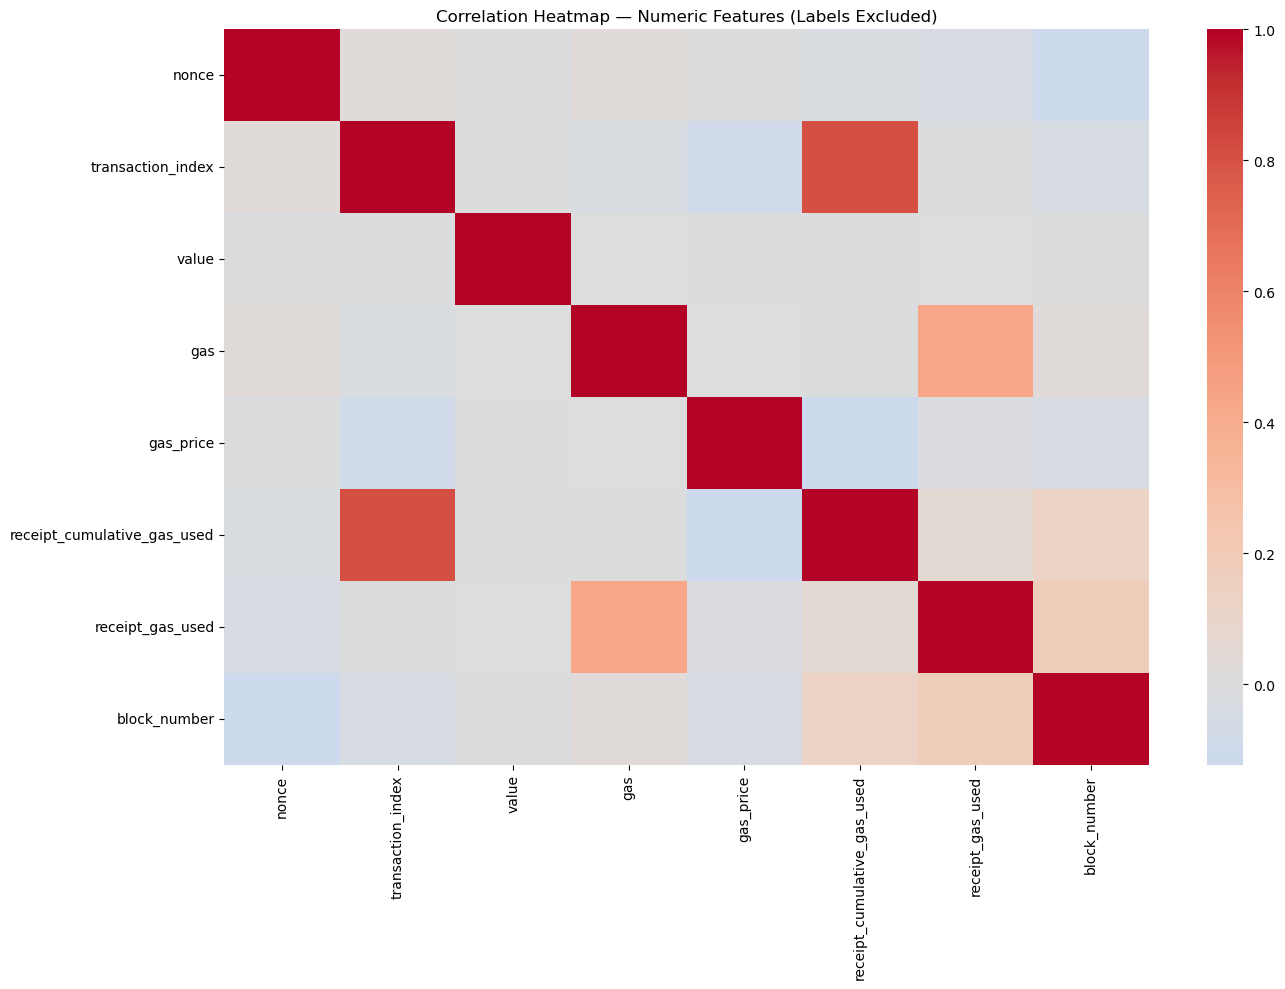

In [22]:
# -----------------------------------------------------
# Correlation Heatmap (Numeric Feature Columns Only)
# -----------------------------------------------------

util.print_sub_heading("Correlation Heatmap (Pure Numeric Features Only)")

print(
    "Label columns (Scam, from_scam, to_scam) are excluded to avoid "
    "inflated or misleading correlations. This map focuses only on "
    "real numeric feature interactions."
)

# All numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# Columns to exclude (labels)
exclude_cols = {
    'Scam', 'from_scam', 'to_scam',
    'from_is_scam', 'to_is_scam'
}

# Keep only true numeric features
numeric_cols = [c for c in numeric_cols if c not in exclude_cols]

corr = df[numeric_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Numeric Features (Labels Excluded)")
plt.tight_layout()
plt.show()


Section 2 — Timestamp & Temporal Sanity Checks


Preprocessing — Timestamp Normalization


----------------------------------------
Purpose
----------------------------------------

Convert raw timestamps into a consistent UTC datetime. Raw strings are preserved in `block_timestamp`.
types:
 block_timestamp
<class 'str'>    71250
Name: count, dtype: int64
isna:
 0
Parsed timestamps: 71250
Unparseable timestamps: 0

----------------------------------------
Sanity check — hour missingness by label
----------------------------------------

Fraction of missing hour values (False=Clean, True=Scam):
False    0.0
True     0.0
Name: hour, dtype: float64

----------------------------------------
Purpose
----------------------------------------

Ethereum timestamps reveal dataset coverage, gaps, and sampling behavior. These plots validate the temporal integrity of the dataset.

----------------------------------------
Transaction Timestamp Distribution
----------------------------------------



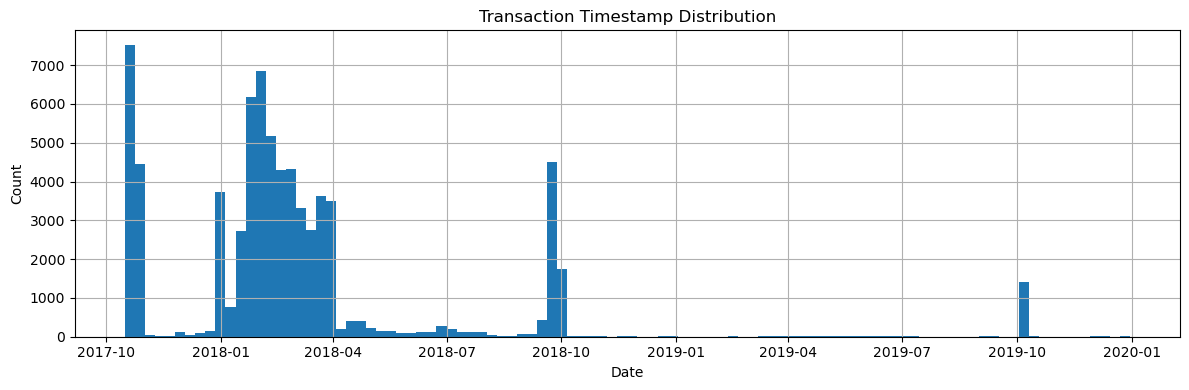


----------------------------------------
Daily Transaction Volume Curve
----------------------------------------



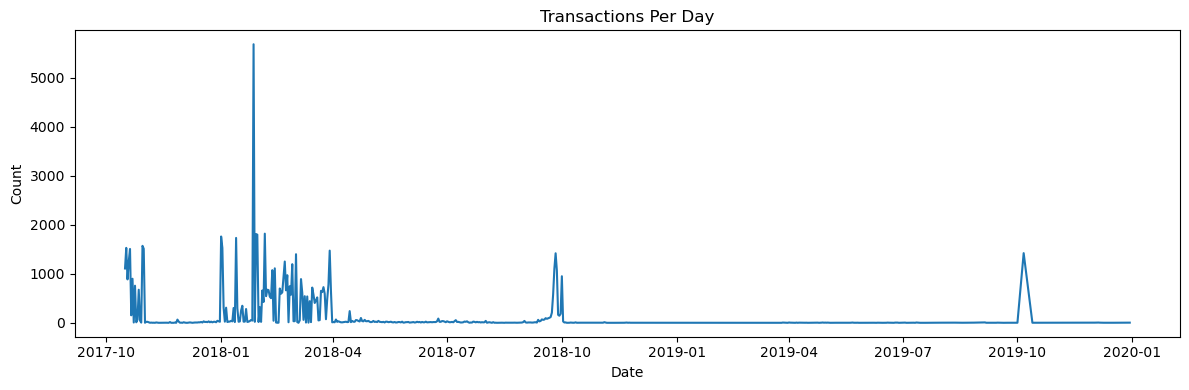


----------------------------------------
Transactions by Hour of Day
----------------------------------------

This chart shows how transaction activity is distributed across hours of the day. Human activity produces peaks; bots produce flat or highly irregular profiles.


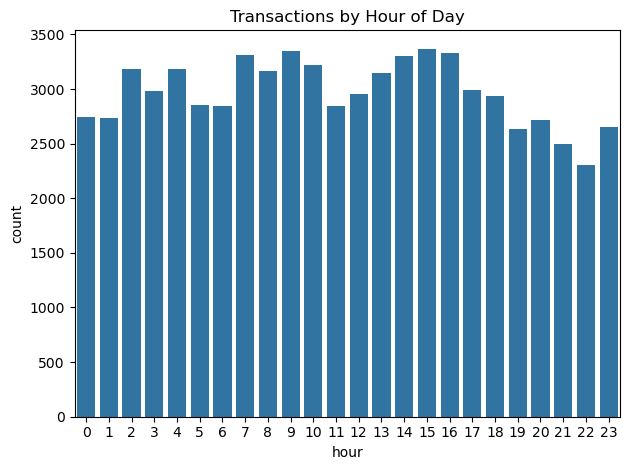


----------------------------------------
Transactions by Day of Week
----------------------------------------

This chart shows weekly activity rhythms. Human activity is cyclical (weekdays vs weekends). Bots and programmatic systems often show no weekly rhythm.


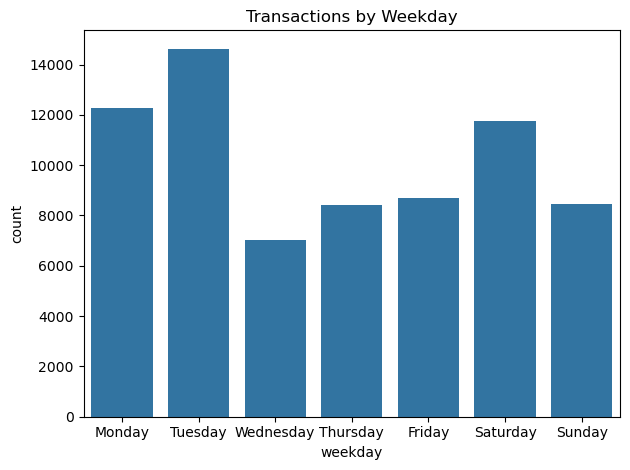

In [ ]:
# ============================================================
# EDA — Timestamp Normalization (Safe, Non-Destructive)
# ============================================================

util.print_heading("Section 2 — Timestamp & Temporal Sanity Checks")
util.print_heading("Preprocessing — Timestamp Normalization")

df = fe.normalize_timestamps(df)

util.print_sub_heading("Sanity check — hour missingness by label")

# Check if missing timestamps are correlated with the label (Data Leak Check)
# We construct a temporary mask because 'is_scam' column doesn't exist yet
if 'from_scam' in df.columns and 'to_scam' in df.columns:
    # A tx is related to a scam if either sender or receiver is a scammer
    scam_mask = (df['from_scam'] == 1) | (df['to_scam'] == 1)
    
    miss_by_label = df.groupby(scam_mask)['hour'].apply(
        lambda s: s.isna().mean()
    )
    
    print("Fraction of missing hour values (False=Clean, True=Scam):")
    print(miss_by_label)
else:
    print("Skipping hour-missingness-by-label check (no from_scam/to_scam columns).")

util.print_sub_heading("Purpose")
print(
    "Ethereum timestamps reveal dataset coverage, gaps, and sampling behavior. "
    "These plots validate the temporal integrity of the dataset."
)

# --- Timestamp Distribution ---
util.print_sub_heading("Transaction Timestamp Distribution")
df['block_timestamp_dt'].hist(bins=100, figsize=(12,4))
plt.title("Transaction Timestamp Distribution")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Daily Volume ---
util.print_sub_heading("Daily Transaction Volume Curve")
daily = df.groupby(df['block_timestamp_dt'].dt.date).size()
plt.figure(figsize=(12,4))
plt.plot(daily.index, daily.values)
plt.title("Transactions Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Hour-of-Day Activity Pattern
# -----------------------------------------------------

util.print_sub_heading("Transactions by Hour of Day")

print(
    "This chart shows how transaction activity is distributed across hours of the day. "
    "Human activity produces peaks; bots produce flat or highly irregular profiles."
)

sns.countplot(x='hour', data=df)
plt.title("Transactions by Hour of Day")
plt.tight_layout()
plt.show()


# -----------------------------------------------------
# Day-of-Week Activity Pattern
# -----------------------------------------------------

util.print_sub_heading("Transactions by Day of Week")

print(
    "This chart shows weekly activity rhythms. "
    "Human activity is cyclical (weekdays vs weekends). "
    "Bots and programmatic systems often show no weekly rhythm."
)

sns.countplot(
    x='weekday',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.title("Transactions by Weekday")
plt.tight_layout()
plt.show()




Section 3 — Intertransaction Gaps (Per Address)


----------------------------------------
Purpose
----------------------------------------

Time gaps between transactions for the same sender reveal whether activity is human-paced or bot-like. Fraudulent wallets often show bursty patterns with very short or highly regular gaps. This section uses per-address gaps, not global network timing.

----------------------------------------
Intertransaction Gap Distribution (log histogram)
----------------------------------------



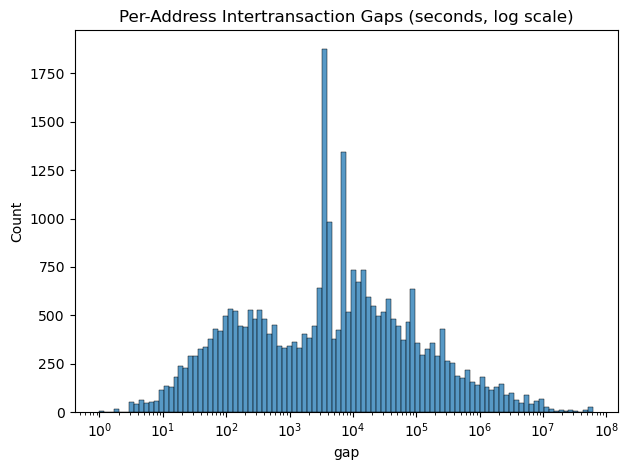


----------------------------------------
Intertransaction Gap CDF
----------------------------------------



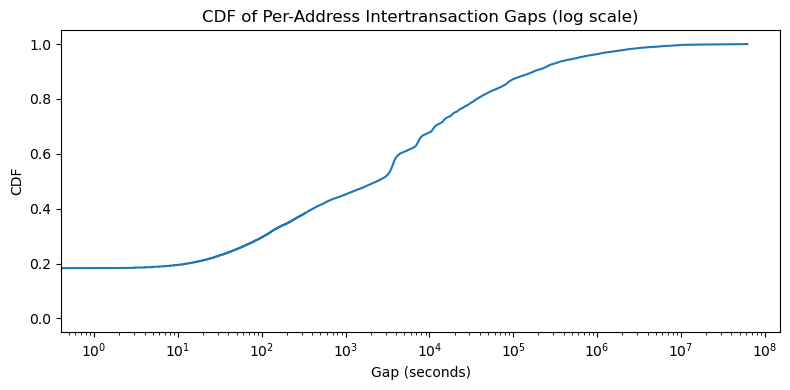

In [12]:
# %%
util.print_heading("Section 3 — Intertransaction Gaps (Per Address)")

util.print_sub_heading("Purpose")
print(
    "Time gaps between transactions for the same sender reveal whether activity is "
    "human-paced or bot-like. Fraudulent wallets often show bursty patterns with "
    "very short or highly regular gaps. This section uses per-address gaps, not "
    "global network timing."
)

# Compute per-address gaps (sender-side)
df_sorted = df.sort_values(["from_address", "block_timestamp_dt"])
df_sorted["gap"] = (
    df_sorted.groupby("from_address")["block_timestamp_dt"]
             .diff()
             .dt.total_seconds()
)

gaps = df_sorted["gap"].dropna()

# Gap histogram (log)
util.print_sub_heading("Intertransaction Gap Distribution (log histogram)")
sns.histplot(gaps, bins=100, log_scale=True)
plt.title("Per-Address Intertransaction Gaps (seconds, log scale)")
plt.tight_layout()
plt.show()

# Gap CDF
util.print_sub_heading("Intertransaction Gap CDF")
gaps_sorted = gaps.sort_values()
yvals = np.arange(len(gaps_sorted)) / float(len(gaps_sorted))
plt.figure(figsize=(8,4))
plt.plot(gaps_sorted, yvals)
plt.xscale("log")
plt.title("CDF of Per-Address Intertransaction Gaps (log scale)")
plt.xlabel("Gap (seconds)")
plt.ylabel("CDF")
plt.tight_layout()
plt.show()


Section 4 — Gas & Value Behavior (Cleaned + Joint)


----------------------------------------
Purpose
----------------------------------------

Ethereum economic behavior (gas usage, gas price, and value transferred) reveals wallet intent. Fraudulent wallets often show atypical gas pricing or transaction values. Log histograms and joint density plots help expose that.

----------------------------------------
Gas Distribution (log histogram)
----------------------------------------



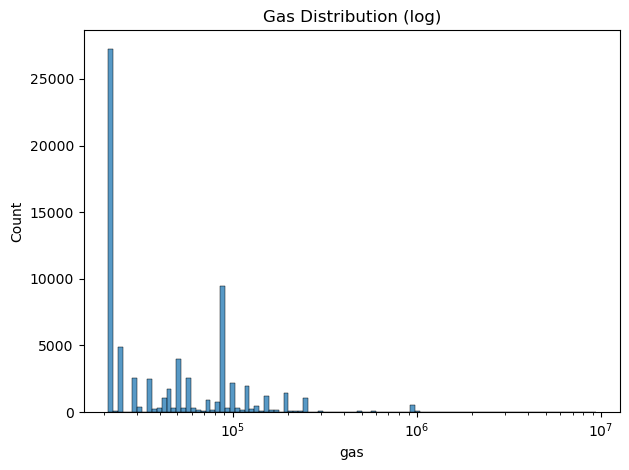


----------------------------------------
Gas Price Distribution (log histogram)
----------------------------------------



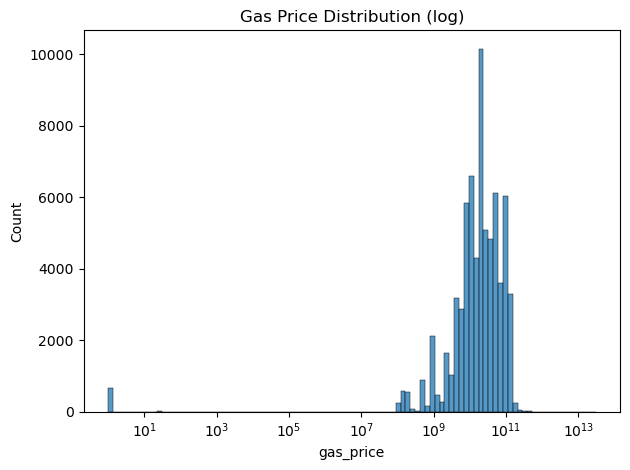


----------------------------------------
Joint Value vs Gas Price (Hexbin, log-log)
----------------------------------------



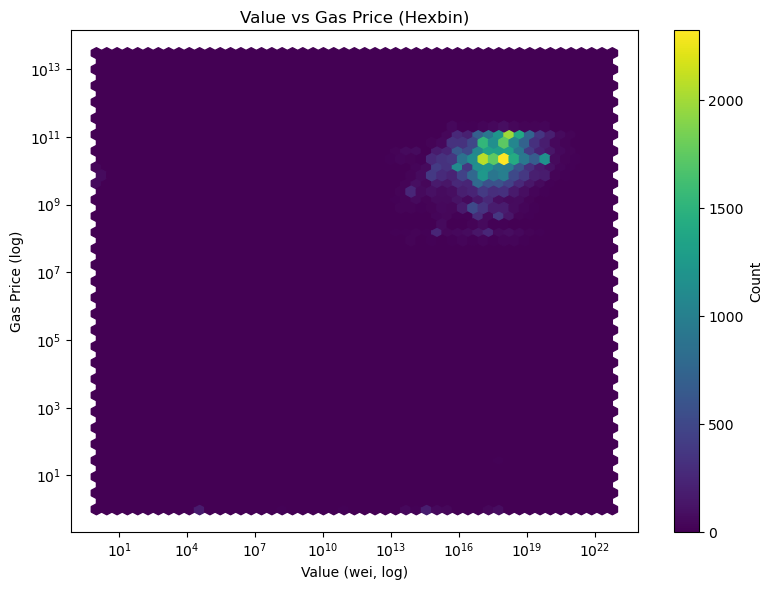

In [13]:
# %%
util.print_heading("Section 4 — Gas & Value Behavior (Cleaned + Joint)")

util.print_sub_heading("Purpose")
print(
    "Ethereum economic behavior (gas usage, gas price, and value transferred) "
    "reveals wallet intent. Fraudulent wallets often show atypical gas pricing "
    "or transaction values. Log histograms and joint density plots help expose that."
)

# Gas histogram (log)
util.print_sub_heading("Gas Distribution (log histogram)")
sns.histplot(df['gas'], bins=100, log_scale=True)
plt.title("Gas Distribution (log)")
plt.tight_layout()
plt.show()

# Gas price histogram (log)
util.print_sub_heading("Gas Price Distribution (log histogram)")
sns.histplot(df['gas_price'], bins=100, log_scale=True)
plt.title("Gas Price Distribution (log)")
plt.tight_layout()
plt.show()

# Cleaned hexbin
util.print_sub_heading("Joint Value vs Gas Price (Hexbin, log-log)")

tmp = df[(df['value'] > 0) & (df['gas_price'] > 0)]

plt.figure(figsize=(8,6))
plt.hexbin(tmp['value'], tmp['gas_price'], gridsize=50, xscale='log', yscale='log')
plt.colorbar(label="Count")
plt.xlabel("Value (wei, log)")
plt.ylabel("Gas Price (log)")
plt.title("Value vs Gas Price (Hexbin)")
plt.tight_layout()
plt.show()


Section 5 — Input Length / Transaction Type


----------------------------------------
Purpose
----------------------------------------

The hex-encoded input field reveals whether a transaction is a plain ETH transfer, a contract interaction, or an ERC20 transfer. The length of the input string is a strong proxy.

----------------------------------------
Distribution of Input Length
----------------------------------------



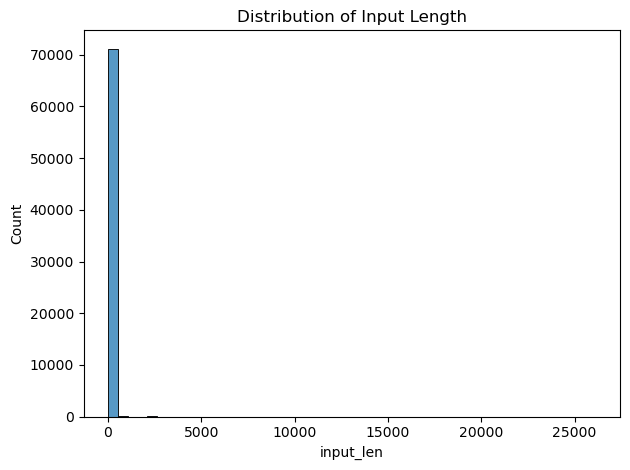


----------------------------------------
Top Input Length Buckets
----------------------------------------



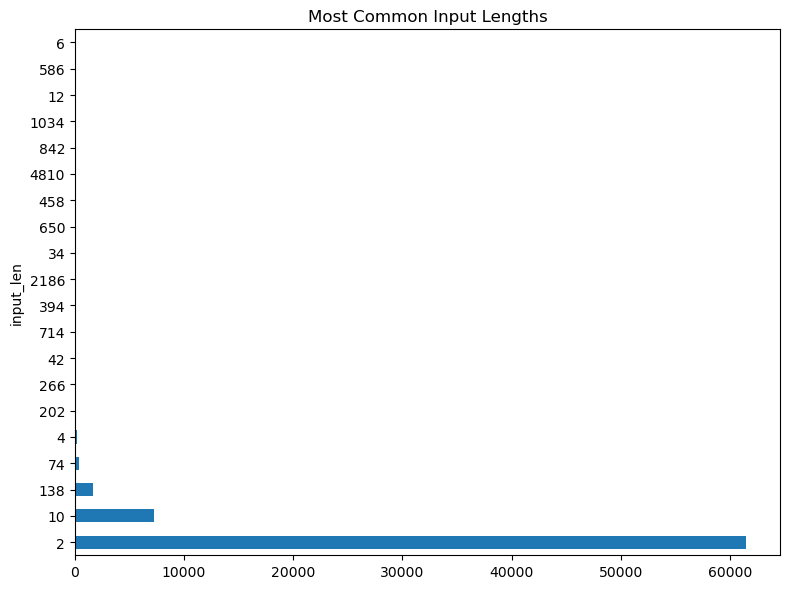

In [14]:
# %%
util.print_heading("Section 5 — Input Length / Transaction Type")

util.print_sub_heading("Purpose")
print(
    "The hex-encoded input field reveals whether a transaction is a plain ETH transfer, "
    "a contract interaction, or an ERC20 transfer. The length of the input string is a strong proxy."
)

# Compute lengths
df['input_len'] = df['input'].astype(str).apply(len)

# Histogram
util.print_sub_heading("Distribution of Input Length")
sns.histplot(df['input_len'], bins=50, log_scale=False)
plt.title("Distribution of Input Length")
plt.tight_layout()
plt.show()

# Top buckets
util.print_sub_heading("Top Input Length Buckets")
df['input_len'].value_counts().head(20).plot(kind='barh', figsize=(8,6))
plt.title("Most Common Input Lengths")
plt.tight_layout()
plt.show()


Section 6 — Address Activity Patterns


----------------------------------------
Purpose
----------------------------------------

Ethereum address activity follows a power-law distribution: a few addresses dominate, while most make only a handful of transactions. Fraud clusters often appear in the tails.

----------------------------------------
Address Rank-Frequency (Zipf Plot)
----------------------------------------



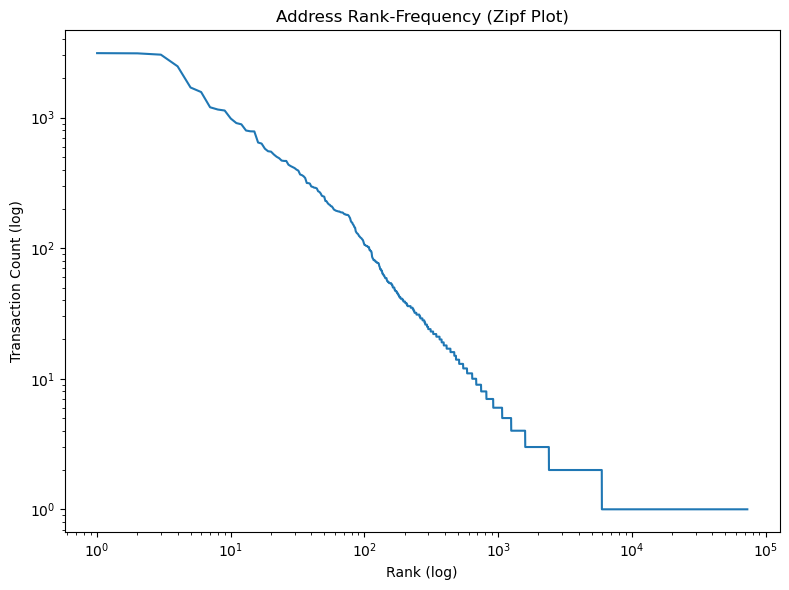


----------------------------------------
In-Degree CDF
----------------------------------------



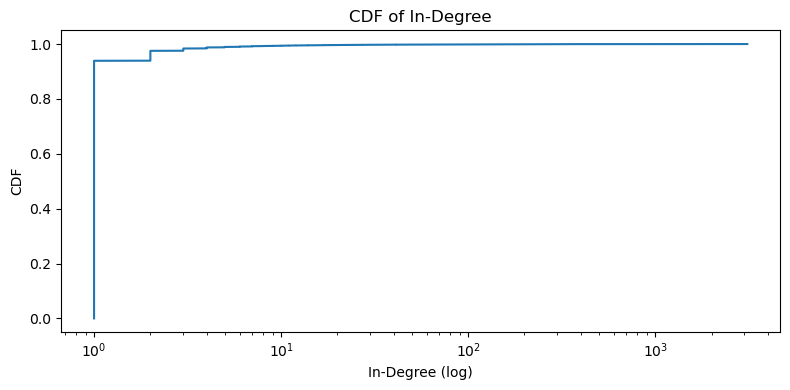


----------------------------------------
Out-Degree CDF
----------------------------------------



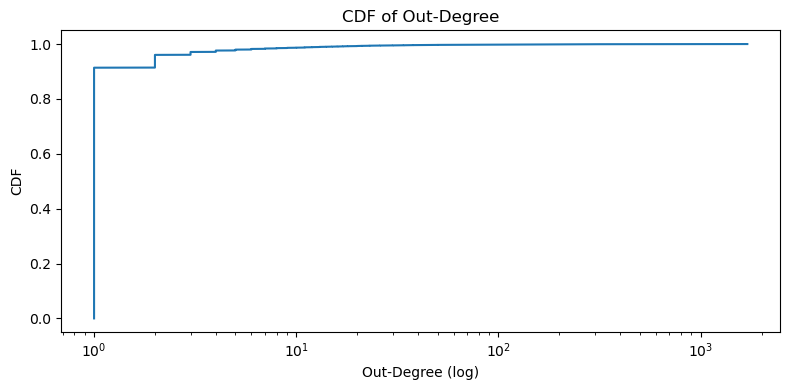

In [15]:
# %%
util.print_heading("Section 6 — Address Activity Patterns")

util.print_sub_heading("Purpose")
print(
    "Ethereum address activity follows a power-law distribution: a few addresses dominate, "
    "while most make only a handful of transactions. Fraud clusters often appear in the tails."
)

# Compute counts
from_counts = df['from_address'].value_counts()
to_counts   = df['to_address'].value_counts()
address_counts = from_counts.add(to_counts, fill_value=0)

# Zipf plot
util.print_sub_heading("Address Rank-Frequency (Zipf Plot)")
rank = np.arange(1, len(address_counts)+1)
freq = np.sort(address_counts.values)[::-1]
plt.figure(figsize=(8,6))
plt.loglog(rank, freq)
plt.xlabel("Rank (log)")
plt.ylabel("Transaction Count (log)")
plt.title("Address Rank-Frequency (Zipf Plot)")
plt.tight_layout()
plt.show()

# In-degree CDF
util.print_sub_heading("In-Degree CDF")
in_deg = to_counts.sort_values()
cdf = np.arange(len(in_deg)) / len(in_deg)
plt.figure(figsize=(8,4))
plt.plot(in_deg.values, cdf)
plt.xscale("log")
plt.xlabel("In-Degree (log)")
plt.ylabel("CDF")
plt.title("CDF of In-Degree")
plt.tight_layout()
plt.show()

# Out-degree CDF
util.print_sub_heading("Out-Degree CDF")
out_deg = from_counts.sort_values()
cdf = np.arange(len(out_deg)) / len(out_deg)
plt.figure(figsize=(8,4))
plt.plot(out_deg.values, cdf)
plt.xscale("log")
plt.xlabel("Out-Degree (log)")
plt.ylabel("CDF")
plt.title("CDF of Out-Degree")
plt.tight_layout()
plt.show()


Section 7 — Scam vs Non-Scam Behavior


----------------------------------------
Purpose
----------------------------------------

Side-by-side distributions expose whether scam-labeled wallets behave differently in value transferred, gas price used, or transaction intent.

----------------------------------------
Value Distribution: Scam vs Non-Scam
----------------------------------------



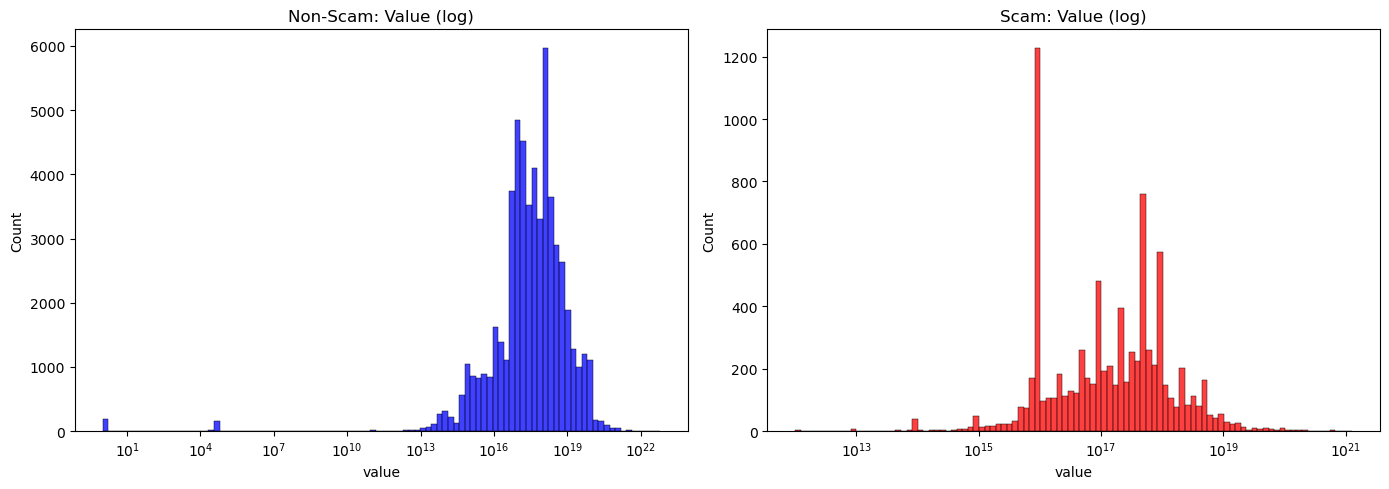


----------------------------------------
Gas Price Distribution: Scam vs Non-Scam
----------------------------------------



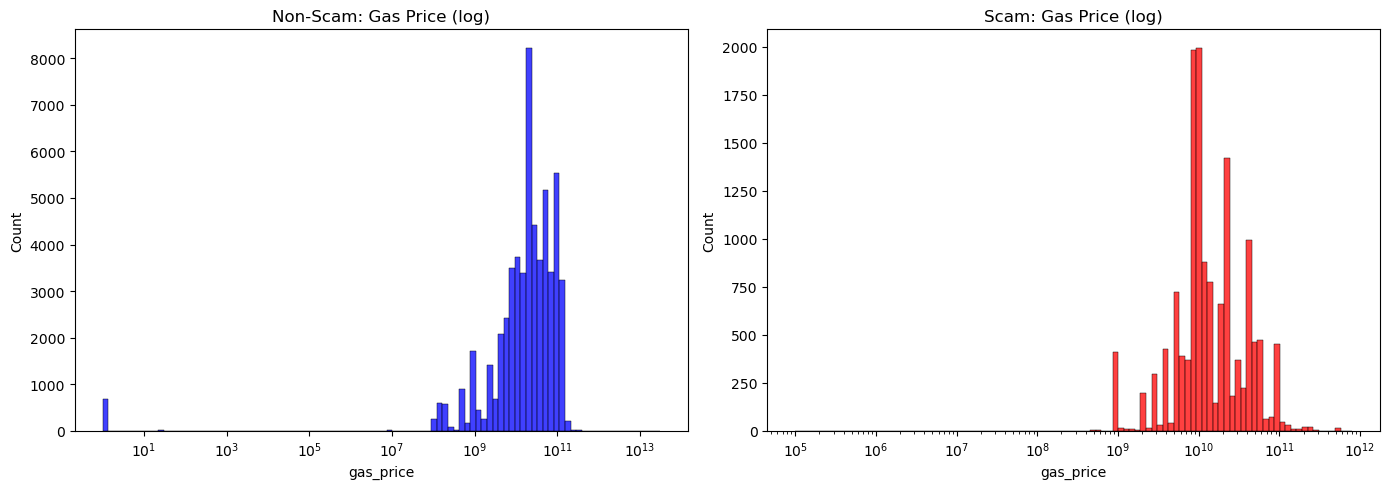


----------------------------------------
Top Non-Missing Categories
----------------------------------------



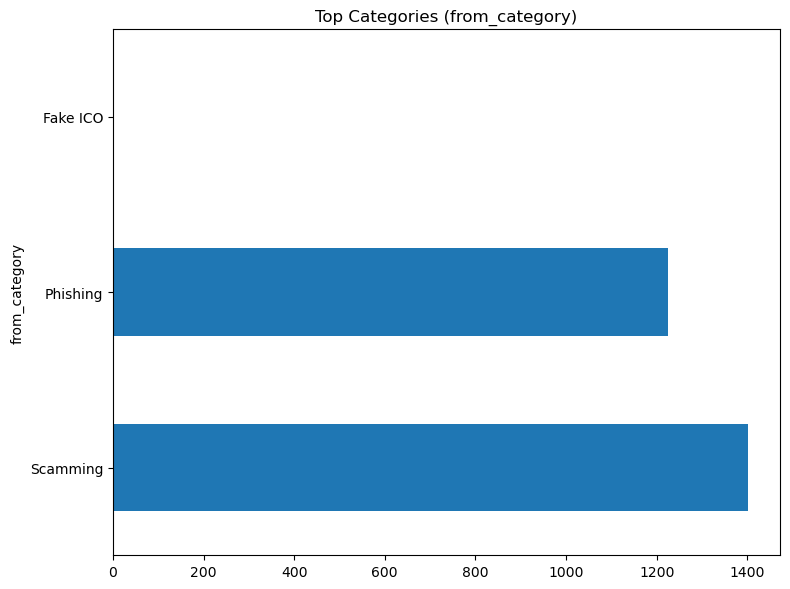

In [16]:
# %%
util.print_heading("Section 7 — Scam vs Non-Scam Behavior")

util.print_sub_heading("Purpose")
print(
    "Side-by-side distributions expose whether scam-labeled wallets behave differently "
    "in value transferred, gas price used, or transaction intent."
)

scam_mask = (df['from_scam']==1) | (df['to_scam']==1)

# Side-by-side layout
fig, axes = plt.subplots(1,2, figsize=(14,5))

util.print_sub_heading("Value Distribution: Scam vs Non-Scam")
sns.histplot(df.loc[~scam_mask, 'value'], bins=100, log_scale=True, ax=axes[0], color='blue')
axes[0].set_title("Non-Scam: Value (log)")
sns.histplot(df.loc[ scam_mask, 'value'], bins=100, log_scale=True, ax=axes[1], color='red')
axes[1].set_title("Scam: Value (log)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(14,5))
util.print_sub_heading("Gas Price Distribution: Scam vs Non-Scam")
sns.histplot(df.loc[~scam_mask, 'gas_price'], bins=100, log_scale=True, ax=axes[0], color='blue')
axes[0].set_title("Non-Scam: Gas Price (log)")
sns.histplot(df.loc[ scam_mask, 'gas_price'], bins=100, log_scale=True, ax=axes[1], color='red')
axes[1].set_title("Scam: Gas Price (log)")
plt.tight_layout()
plt.show()

# Top categories
util.print_sub_heading("Top Non-Missing Categories")
(df['from_category'].dropna().value_counts().head(10)).plot(kind='barh', figsize=(8,6))
plt.title("Top Categories (from_category)")
plt.tight_layout()
plt.show()

In [ ]:
# %%
util.print_heading("EDA Complete — Dataset Ready for Feature Engineering")

## Key Takeaways from the EDA

---

### 1. This is a stitched subset of Ethereum, not a full firehose

The timestamp distribution and daily volume curve show dense activity in a few windows with long quiet stretches in between. All timestamps parse cleanly, but the coverage is clearly irregular rather than a continuous scrape of the chain.

**Implication:**  
Time features should be interpreted as describing **per-wallet behavior within this sampled window**, not global network conditions.

---

### 2. Time-of-day and weekday patterns are weak but not nonexistent

Transactions are spread across all 24 hours with only a mild bump in late-morning / afternoon. Weekdays are uneven (e.g., Tuesday and Saturday heavier, Wednesday lighter), but without a clean “work-weekend” rhythm.

**Implication:**  
Hour / weekday features may provide **subtle** signal (especially once combined with other behavior), but they are not primary drivers on their own.

---

### 3. Intertransaction gaps show heavy-tailed, bursty behavior

The gap histogram (on a log scale) and CDF show many very short gaps and a long tail of very large gaps. This is consistent with wallets that sit idle, then fire off rapid bursts of transactions.

**Implication:**  
Gap-based statistics (mean / max / min gap, burstiness, active duration) are promising features for distinguishing human-paced vs bot-like and scammy behavior.

---

### 4. Gas usage and value are extremely skewed

Gas, gas_price, and value histograms on a log scale all exhibit long tails and distinct operating regimes. The value vs gas_price hexbin plot reveals dense “normal” zones plus scattered outliers.

**Implication:**  
Raw per-transaction values are not directly interpretable; **address-level aggregates** (mean / max / total value, mean gas price / gas limit) are much more stable for modeling.

---

### 5. Input length confirms a mix of plain transfers and contract interactions

Most transactions have `input_len = 2` (plain ETH transfers). A long tail of larger input lengths corresponds to contract calls and token operations.

**Implication:**  
Simple input-length statistics per address can act as a cheap proxy for “plain transfer wallet” vs “contract-heavy wallet”.

---

### 6. Address activity is heavy-tailed

The rank–frequency (Zipf) plot and in/out-degree CDFs show that a tiny fraction of addresses account for most of the activity, while the majority appear only once or a handful of times.

**Implication:**  
Degree, transaction count, and unique counterparty features are essential. Scam behavior can show up as either extremely low diversity funnels or unusually high fan-out.

---

### 7. Scam vs non-scam distributions differ in meaningful ways

Scam-linked transactions have visibly different distributions of value and gas_price compared to non-scams, with distinct clusters and outliers.

**Implication:**  
There is genuine separable signal in the engineered **behavioral aggregates** (value/gas, timing, degree, burstiness). The downstream model is justified in leaning heavily on these features.

### Note on Splitting Strategy: Transaction-Disjoint vs. Entity-Disjoint

For this analysis, we utilize a **Transaction-Disjoint (Temporal)** split, not a strict Entity-Disjoint split.

1.  **Temporal Cutoff:** We split transactions at a specific timestamp. Features for the training set are built *exclusively* from past transactions. Features for the test set are built *exclusively* from future transactions.
2.  **Entity Overlap:** An address active in the past and the future will appear in both sets (represented by different feature vectors calculated at different times). This models an **Account Monitoring** scenario: "Given what we knew about this wallet in the past, can we predict if it is (or will become) a scam?"
3.  **Global Labeling:** The `Scam` label is derived from the full dataset likelihood. If a wallet is identified as a scam in the future window, it is labeled as a scam in the training data. This allows the model to learn the *precursors* to labeled fraud.

In [ ]:
# %%
print_heading("Address-Level Labels and Time-Aware Split")

from sklearn.model_selection import train_test_split

# ------------------------------------------------------------
# 1. Build address-level Scam label ONCE using full df
# ------------------------------------------------------------

def is_scam_category(x):
    """Return True if category text suggests scam/fraud/phish."""
    if pd.isna(x):
        return False
    x = str(x).lower()
    return ("scam" in x) or ("fraud" in x) or ("phish" in x)

# Flag scam-like rows at transaction level (for labeling only)
from_is_scam = (
    df["from_scam"].fillna(0).astype(int)
    | df["from_category"].apply(is_scam_category)
)
to_is_scam = (
    df["to_scam"].fillna(0).astype(int)
    | df["to_category"].apply(is_scam_category)
)

scam_addresses = pd.Index(
    pd.concat(
        [
            df.loc[from_is_scam, "from_address"],
            df.loc[to_is_scam, "to_address"],
        ]
    )
).dropna().unique()

# All unique addresses seen anywhere in the dataset
all_addresses = pd.Index(
    pd.concat([df["from_address"], df["to_address"]])
).dropna().unique()

addr_df = pd.DataFrame({"Address": all_addresses})
addr_df["Scam"] = addr_df["Address"].isin(scam_addresses).astype(int)

print("Total addresses:", len(addr_df))
print("Total scam addresses:", int(addr_df["Scam"].sum()))


# TEMP CODE
print_sub_heading("Quantile vs Scam Address Coverage")

CANDIDATE_QS = [0.7, 0.8, 0.85, 0.9, 0.95]

for q in CANDIDATE_QS:
    cutoff = df["block_timestamp_dt"].quantile(q)
    df_past_q = df[df["block_timestamp_dt"] < cutoff]

    past_addrs_q = pd.Index(
        pd.concat([df_past_q["from_address"], df_past_q["to_address"]])
    ).dropna().unique()

    addr_df_past_q = addr_df[addr_df["Address"].isin(past_addrs_q)]

    total_past   = len(addr_df_past_q)
    scams_past   = int(addr_df_past_q["Scam"].sum())
    scams_total  = int(addr_df["Scam"].sum())

    print(f"q={q:.2f}  cutoff={cutoff}")
    print(f"  past addresses:       {total_past:,}")
    print(f"  past scam addresses:  {scams_past:,} "
          f"({scams_past / max(scams_total,1):.1%} of all scams)")
    print()
#END OF TEMP CODE



In [ ]:
print_heading("Sanity Check — Random Entity-Disjoint Split (No Time Cutoff)")

from sklearn.model_selection import train_test_split

all_addrs = addr_df["Address"].values
train_addrs_rand, test_addrs_rand = train_test_split(
    all_addrs,
    test_size=0.2,
    stratify=addr_df["Scam"],
    random_state=42,
)

raw_train_rand = df[
    df["from_address"].isin(train_addrs_rand) |
    df["to_address"].isin(train_addrs_rand)
].copy()

raw_test_rand = df[
    df["from_address"].isin(test_addrs_rand) |
    df["to_address"].isin(test_addrs_rand)
].copy()

features_train_rand = engineer_features(
    raw_train_rand,
    train_addrs_rand,
    addr_df,
    global_start=global_start,
    split_name="Rand-Train",
)

features_test_rand = engineer_features(
    raw_test_rand,
    test_addrs_rand,
    addr_df,
    global_start=global_start,
    split_name="Rand-Test",
)

In [ ]:
print_heading("Baseline Modeling — Random Entity-Disjoint Split")

TARGET_COL = "Scam"

features_train_rand_path = "data/address_features_rand_train.csv"
features_test_rand_path  = "data/address_features_rand_test.csv"

features_train_rand.to_csv(features_train_rand_path)
features_test_rand.to_csv(features_test_rand_path)

print("Saved Rand-Train features →", features_train_rand_path)
print("Saved Rand-Test  features →", features_test_rand_path)

# --- Build X/y ---

FEATURE_COLUMNS_RAND = [c for c in features_train_rand.columns if c != TARGET_COL]

X_trainval_rand = features_train_rand[FEATURE_COLUMNS_RAND].copy()
y_trainval_rand = features_train_rand[TARGET_COL].astype(int).values

X_test_rand = features_test_rand.reindex(columns=FEATURE_COLUMNS_RAND).copy()
y_test_rand = features_test_rand[TARGET_COL].astype(int).values

print("Rand Train+Val shape:", X_trainval_rand.shape)
print("Rand Test shape:     ", X_test_rand.shape)
print("Rand Train+Val positives:", int(y_trainval_rand.sum()))
print("Rand Train+Val negatives:", int((y_trainval_rand == 0).sum()))
print("Rand Test positives:     ", int(y_test_rand.sum()))
print("Rand Test negatives:     ", int((y_test_rand == 0).sum()))

In [ ]:
def run_baselines(X_trainval, y_trainval, X_test, y_test, feature_cols, label="Default"):
    print_heading(f"Running Baselines — {label}")

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBClassifier

    # Train/Val split
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval,
        y_trainval,
        test_size=0.15,
        stratify=y_trainval,
        random_state=42,
    )

    # Scaling
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=feature_cols, index=X_train.index)
    X_val_scaled   = pd.DataFrame(scaler.transform(X_val),   columns=feature_cols, index=X_val.index)
    X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=feature_cols, index=X_test.index)

    # Models
    baseline_models = []

    log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1, solver="lbfgs")
    baseline_models.append(("LogisticRegression", log_reg, "scaled"))

    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42,
    )
    baseline_models.append(("RandomForest", rf, "raw"))

    et = ExtraTreesClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42,
    )
    baseline_models.append(("ExtraTrees", et, "raw"))

    pos = (y_train == 1).sum()
    neg = (y_train == 0).sum()
    scale_pos_weight = neg / max(pos, 1)

    xgb = XGBClassifier(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
    )
    baseline_models.append(("XGBoost", xgb, "raw"))

    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-3,
        batch_size=256,
        learning_rate="adaptive",
        max_iter=50,
        early_stopping=True,
        random_state=42,
    )
    baseline_models.append(("MLP", mlp, "scaled"))

    # Run
    results = []
    for name, model, space in baseline_models:
        Xtr = X_train_scaled if space == "scaled" else X_train
        Xv  = X_val_scaled   if space == "scaled" else X_val
        Xte = X_test_scaled  if space == "scaled" else X_test

        res = evaluate_model(
            name,
            model,
            Xtr, y_train,
            Xv,  y_val,
            Xte, y_test,
            threshold=0.5,
        )
        results.append(res)

    # Comparison table
    rows = []
    for r in results:
        n = r["model_name"]
        for split in ["val", "test"]:
            m = r[split]
            rows.append({
                "model": n,
                "split": split,
                "accuracy": m["accuracy"],
                "precision": m["precision"],
                "recall": m["recall"],
                "f1": m["f1"],
                "roc_auc": m["roc_auc"],
                "avg_precision": m["avg_precision"],
            })
    comp = pd.DataFrame(rows)
    display(
        comp[comp["split"] == "val"].drop(columns=["split"]).sort_values("avg_precision", ascending=False)
    )
    display(
        comp[comp["split"] == "test"].drop(columns=["split"]).sort_values("avg_precision", ascending=False)
    )

    return results

In [ ]:
def run_baselines(X_trainval, y_trainval, X_test, y_test, feature_cols, label="Default"):
    print_heading(f"Running Baselines — {label}")

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.neural_network import MLPClassifier
    from xgboost import XGBClassifier

    # Train/Val split
    X_train, X_val, y_train, y_val = train_test_split(
        X_trainval,
        y_trainval,
        test_size=0.15,
        stratify=y_trainval,
        random_state=42,
    )

    # Scaling
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=feature_cols, index=X_train.index)
    X_val_scaled   = pd.DataFrame(scaler.transform(X_val),   columns=feature_cols, index=X_val.index)
    X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=feature_cols, index=X_test.index)

    # Models
    baseline_models = []

    log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", n_jobs=-1, solver="lbfgs")
    baseline_models.append(("LogisticRegression", log_reg, "scaled"))

    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42,
    )
    baseline_models.append(("RandomForest", rf, "raw"))

    et = ExtraTreesClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42,
    )
    baseline_models.append(("ExtraTrees", et, "raw"))

    pos = (y_train == 1).sum()
    neg = (y_train == 0).sum()
    scale_pos_weight = neg / max(pos, 1)

    xgb = XGBClassifier(
        n_estimators=400,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist",
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
    )
    baseline_models.append(("XGBoost", xgb, "raw"))

    mlp = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-3,
        batch_size=256,
        learning_rate="adaptive",
        max_iter=50,
        early_stopping=True,
        random_state=42,
    )
    baseline_models.append(("MLP", mlp, "scaled"))

    # Run
    results = []
    for name, model, space in baseline_models:
        Xtr = X_train_scaled if space == "scaled" else X_train
        Xv  = X_val_scaled   if space == "scaled" else X_val
        Xte = X_test_scaled  if space == "scaled" else X_test

        res = evaluate_model(
            name,
            model,
            Xtr, y_train,
            Xv,  y_val,
            Xte, y_test,
            threshold=0.5,
        )
        results.append(res)

    # Comparison table
    rows = []
    for r in results:
        n = r["model_name"]
        for split in ["val", "test"]:
            m = r[split]
            rows.append({
                "model": n,
                "split": split,
                "accuracy": m["accuracy"],
                "precision": m["precision"],
                "recall": m["recall"],
                "f1": m["f1"],
                "roc_auc": m["roc_auc"],
                "avg_precision": m["avg_precision"],
            })
    comp = pd.DataFrame(rows)
    display(
        comp[comp["split"] == "val"].drop(columns=["split"]).sort_values("avg_precision", ascending=False)
    )
    display(
        comp[comp["split"] == "test"].drop(columns=["split"]).sort_values("avg_precision", ascending=False)
    )

    return results

In [ ]:
rand_results = run_baselines(
    X_trainval_rand,
    y_trainval_rand,
    X_test_rand,
    y_test_rand,
    FEATURE_COLUMNS_RAND,
    label="Random Entity-Disjoint",
)

In [ ]:


# ------------------------------------------------------------
# 2. Define time-based Past vs Future split
# ------------------------------------------------------------

print_sub_heading("Defining Past vs Future Windows")

# Choose quantile based on scam coverage diagnostics above
CUTOFF_Q = 0.90   # <- change to 0.85 if you want a bigger test set instead
CUTOFF = df["block_timestamp_dt"].quantile(CUTOFF_Q)
print(f"Time cutoff for train vs test (q={CUTOFF_Q}): {CUTOFF}")

df_past   = df[df["block_timestamp_dt"] <  CUTOFF].copy()
df_future = df[df["block_timestamp_dt"] >= CUTOFF].copy()

print("Past rows:", len(df_past))
print("Future rows:", len(df_future))

# ------------------------------------------------------------
# 3. Address pools for Train+Val (past) and Test (future)
# ------------------------------------------------------------

# Addresses with at least one transaction BEFORE cutoff
past_addrs = pd.Index(
    pd.concat([df_past["from_address"], df_past["to_address"]])
).dropna().unique()

addr_df_past = addr_df[addr_df["Address"].isin(past_addrs)].copy()
print("Addresses with at least one past tx:", len(addr_df_past))

# Entity-level Train/Val split WITHIN the past window
trainval_addrs, _ = train_test_split(
    addr_df_past["Address"],
    test_size=0.15,          # same relative size as before
    stratify=addr_df_past["Scam"],
    random_state=42,
)

print("Train+Val addresses (past window):", len(trainval_addrs))

# Test addresses: any address active ON/AFTER cutoff
future_addrs = pd.Index(
    pd.concat([df_future["from_address"], df_future["to_address"]])
).dropna().unique()

test_addrs = future_addrs
print("Test addresses (future window):", len(test_addrs))

# ------------------------------------------------------------
# 4. Build raw transaction universes (time-disjoint)
# ------------------------------------------------------------

raw_trainval = df_past[
    df_past["from_address"].isin(trainval_addrs)
    | df_past["to_address"].isin(trainval_addrs)
].copy()

raw_test = df_future[
    df_future["from_address"].isin(test_addrs)
    | df_future["to_address"].isin(test_addrs)
].copy()

print("Raw Train+Val tx rows (past):", len(raw_trainval))
print("Raw Test tx rows (future):   ", len(raw_test))

# ------------------------------------------------------------
# 5. Sanity checks: each tx belongs to its side
# ------------------------------------------------------------

train_set = set(trainval_addrs)
test_set  = set(test_addrs)

# Note: addresses generally appear in BOTH sets (seen in past and future).
# We are predicting future status based on past behavior (Account Monitoring context).

overlap = train_set & test_set
print("Address overlap (seen in both past and future):", len(overlap))

# Check that every tx in each universe has at least one address
# from the correct pool (by construction, they should)
bad_train = raw_trainval[
    (~raw_trainval["from_address"].isin(train_set)) &
    (~raw_trainval["to_address"].isin(train_set))
]
bad_test = raw_test[
    (~raw_test["from_address"].isin(test_set)) &
    (~raw_test["to_address"].isin(test_set))
]

print("Raw Train+Val rows with no Train+Val address:", len(bad_train))
print("Raw Test rows with no Test address:", len(bad_test))

assert len(bad_train) == 0, "Found tx in raw_trainval with no Train+Val address"
assert len(bad_test) == 0,  "Found tx in raw_test with no Test address"

In [ ]:
# %%
# ======================================================================
# Address-Level Feature Engineering (Polished)
# ======================================================================

import pandas as pd
import numpy as np

print_heading("Defining Address-Level Feature Engineering (Transaction-Disjoint)")

# Global reference start time for all splits
global_start = df["block_timestamp_dt"].min()
if pd.isna(global_start):
    raise ValueError("Global start timestamp is NaT — check timestamp parsing.")
print("Global start timestamp:", global_start)

def engineer_features(transaction_df, target_addresses, addr_labels,
                      global_start, split_name=""):
    """
    Build address-level features using ONLY the provided transaction_df.
    target_addresses: iterable of addresses belonging to this split.
    addr_labels: addr_df with columns ['Address', 'Scam'] from the split cell.
    global_start: reference timestamp (e.g., min over full df['block_timestamp_dt']).
    """
    split_label = split_name or "Addresses"
    print_heading(f"Preparing Transaction Data for Feature Engineering — {split_label}")

    tx = transaction_df.copy()
    print("Initial row count:", len(tx))

    # ==================================================================
    # 1. TIMESTAMP REUSE (fixed, consistent across splits)
    # ==================================================================
    print_heading("1. Timestamp Reuse")

    if "block_timestamp_dt" not in tx.columns:
        raise ValueError("Expected df['block_timestamp_dt'] from EDA parsing step.")

    # Keep a clean copy of the original string for reference
    tx["block_timestamp_raw_string"] = tx["block_timestamp"].astype(str)

    # Compute ts_seconds from the globally-consistent start
    tx["ts_seconds"] = (tx["block_timestamp_dt"] - global_start).dt.total_seconds()

    # ==================================================================
    # 2. NUMERIC CLEANING (zero-loss, identical within this split)
    # ==================================================================
    print_heading("Numeric Column Diagnostics")

    for col in ["value", "gas", "gas_price"]:
        raw = tx[col].astype(str)
        bad_mask = pd.to_numeric(raw, errors="coerce").isna()
        print(f"{col}: invalid={bad_mask.sum()}")
        tx[col] = pd.to_numeric(raw, errors="coerce").fillna(0)

    print("Numeric cleaning complete. Rows retained:", len(tx))

    # ==================================================================
    # 3. DEGREE & AMOUNT FEATURES
    # ==================================================================
    print_heading("Degree & Amount Features")

    in_degree  = tx.groupby("to_address").size().rename("in_degree")
    out_degree = tx.groupby("from_address").size().rename("out_degree")

    unique_in_degree = (
        tx.groupby("to_address")["from_address"]
        .nunique()
        .rename("unique in_degree")
    )

    unique_out_degree = (
        tx.groupby("from_address")["to_address"]
        .nunique()
        .rename("unique out_degree")
    )

    # --- Amounts ---
    incoming_vals = tx[tx["to_address"].notna()].copy()
    incoming_vals["value"] = incoming_vals["value"].replace({0: np.nan})
    incoming_amounts = (
        incoming_vals.groupby("to_address")["value"]
            .agg(["mean","sum","max","min"])
            .rename(columns={
                "mean":"Avg amount incoming",
                "sum":"Total amount incoming",
                "max":"Max amount incoming",
                "min":"Min amount incoming",
            })
    )

    outgoing_vals = tx[tx["from_address"].notna()].copy()
    outgoing_vals["value"] = outgoing_vals["value"].replace({0: np.nan})
    outgoing_amounts = (
        outgoing_vals.groupby("from_address")["value"]
            .agg(["mean","sum","max","min"])
            .rename(columns={
                "mean":"Avg amount outgoing",
                "sum":"Total amount outgoing",
                "max":"Max amount outgoing",
                "min":"Min amount outgoing",
            })
    )

    # ==================================================================
    # 4. BUILD FEATURE TABLE (safe ordering)
    # ==================================================================
    all_addrs_split = pd.concat(
        [tx["from_address"], tx["to_address"]]
    ).dropna().unique()

    features = pd.DataFrame(index=all_addrs_split)
    features.index.name = "Address"

    features = (
        features.join(in_degree, how="left")
                .join(out_degree, how="left")
                .join(unique_in_degree, how="left")
                .join(unique_out_degree, how="left")
    )

    features["Tx count"] = (
        features["in_degree"].fillna(0).astype(int) +
        features["out_degree"].fillna(0).astype(int)
    )

    features = (
        features.join(incoming_amounts, how="left")
                .join(outgoing_amounts, how="left")
    )

    # ==================================================================
    # 5. TIME-BASED FEATURES (fixed Total Tx Time logic)
    # ==================================================================
    print_heading("Time-Based Features")

    def compute_time_metrics(group):
        times = np.sort(group["ts_seconds"].dropna().values)

        if len(times) <= 1:
            return pd.Series({
                "Active Duration": 0.0,
                "Total Tx Time": 0.0,
                "Mean time interval": 0.0,
                "Max time interval": 0.0,
                "Min time interval": 0.0,
            })

        gaps = np.diff(times)

        return pd.Series({
            "Active Duration": float(times[-1] - times[0]),
            "Total Tx Time": float(gaps.sum()),   # TRUE definition
            "Mean time interval": float(gaps.mean()),
            "Max time interval": float(gaps.max()),
            "Min time interval": float(gaps.min()),
        })

    # ------------------------------------------------------------------
    # 5B. ADVANCED TEMPORAL FEATURES
    # ------------------------------------------------------------------
    print_heading("Advanced Temporal Behavior Features")

    long_in = tx[["to_address","ts_seconds","gas","gas_price","block_timestamp_dt"]] \
        .rename(columns={"to_address":"Address","block_timestamp_dt":"timestamp"})
    long_in["direction"] = "in"

    long_out = tx[["from_address","ts_seconds","gas","gas_price","block_timestamp_dt"]] \
        .rename(columns={"from_address":"Address","block_timestamp_dt":"timestamp"})
    long_out["direction"] = "out"

    long_advanced = pd.concat([long_in, long_out], ignore_index=True).dropna(subset=["Address"])
    long_advanced["hour"] = long_advanced["timestamp"].dt.hour

    # Avg times
    avg_in = (
        long_advanced[long_advanced["direction"]=="in"]
            .groupby("Address")["ts_seconds"].mean()
            .rename("Avg time incoming")
    )
    avg_out = (
        long_advanced[long_advanced["direction"]=="out"]
            .groupby("Address")["ts_seconds"].mean()
            .rename("Avg time outgoing")
    )

    # POLISH: Join without immediate fillna(0.0)
    features = features.join(avg_in, how="left").join(avg_out, how="left")

    # Core time metrics
    time_metrics = long_advanced.groupby("Address").apply(compute_time_metrics)
    # POLISH: Join without immediate fillna(0.0)
    features = features.join(time_metrics, how="left")

    # Burstiness
    def compute_burstiness(g):
        times = np.sort(g["ts_seconds"].dropna().values)
        if len(times) <= 2:
            return pd.Series({"Burstiness": 0.0})
        gaps = np.diff(times)
        med = np.median(gaps)
        return pd.Series({"Burstiness": float(gaps.max() / med if med != 0 else gaps.max())})

    # POLISH: Join without immediate fillna(0.0)
    features = features.join(
        long_advanced.groupby("Address").apply(compute_burstiness),
        how="left"
    )

    # Density — MUST fill 'Active Duration' locally for the math to work (div by zero protection)
    duration_safe = features["Active Duration"].fillna(0.0)
    features["Activity Density"] = features["Tx count"] / (duration_safe + 1.0)

    # In/out counts
    incoming_ct = (
        long_advanced[long_advanced["direction"]=="in"]
        .groupby("Address").size().rename("Incoming count")
    )
    outgoing_ct = (
        long_advanced[long_advanced["direction"]=="out"]
        .groupby("Address").size().rename("Outgoing count")
    )

    # POLISH: Join without immediate fillna(0)
    features = features.join(incoming_ct, how="left").join(outgoing_ct, how="left")

    # Ratio — MUST fill locally for the math (Inc+1)/(Out+1)
    inc_safe = features["Incoming count"].fillna(0)
    out_safe = features["Outgoing count"].fillna(0)
    features["In/Out Ratio"] = (inc_safe + 1) / (out_safe + 1)

    # Hour featurization
    records = []
    for addr, g in long_advanced.groupby("Address"):
        hrs = g["hour"].dropna().astype(int).values
        if len(hrs) == 0:
            records.append((addr, 0.0, 0.0))
            continue
        hist = np.bincount(hrs, minlength=24)
        probs = hist / hist.sum()
        nz = probs[probs > 0]
        entropy = float(-(nz * np.log2(nz)).sum())
        records.append((addr, float(hrs.mean()), entropy))

    hour_df = pd.DataFrame(records, columns=["Address","Hour mean","Hour entropy"]).set_index("Address")
    
    # POLISH: Join without immediate fillna
    features = features.join(hour_df, how="left")

    # Recency
    dataset_end = tx["ts_seconds"].max()
    last_seen = long_advanced.groupby("Address")["ts_seconds"].max().rename("Last seen")

    features = features.join(last_seen, how="left")
    # Recency - fill 'Last seen' locally for the math
    features["Recency"] = dataset_end - features["Last seen"].fillna(0.0)

    # ==================================================================
    # 6. GAS FEATURES
    # ==================================================================
    print_heading("Gas-Based Features")

    gas_by_addr = long_advanced.groupby("Address")

    avg_gas_price = gas_by_addr["gas_price"].mean().rename("Avg gas price")
    avg_gas_limit = gas_by_addr["gas"].mean().rename("Avg gas limit")

    # POLISH: Join without immediate fillna(0.0)
    features = features.join(avg_gas_price, how="left").join(avg_gas_limit, how="left")

    # ==================================================================
    # 7. ALIGN TO TARGET ADDRESS LIST + LABELS (no leakage)
    # ==================================================================
    print_heading("Aligning Features to Target Address List")

    target_index = pd.Index(target_addresses)
    features = features.reindex(index=target_index)

    # Join Scam label from addr_labels (built once, globally)
    labels_idx = addr_labels.set_index("Address")["Scam"]
    features["Scam"] = labels_idx.loc[features.index].astype(int)

    # ==================================================================
    # 8. FINAL CLEANUP — Centralized Fill Strategy
    # ==================================================================
    
    # A. Integers (Counts & Degrees)
    # Added "Incoming count", "Outgoing count" to this list so they become clean Ints
    degree_cols = [
        "in_degree","out_degree",
        "unique in_degree","unique out_degree",
        "Incoming count", "Outgoing count"
    ]

    for c in degree_cols:
        if c not in features.columns:
            features[c] = 0

    features[degree_cols] = features[degree_cols].fillna(0).astype("Int64")

    # B. Amounts (Floats)
    amount_cols = [
        "Avg amount incoming","Total amount incoming",
        "Max amount incoming","Min amount incoming",
        "Avg amount outgoing","Total amount outgoing",
        "Max amount outgoing","Min amount outgoing",
    ]

    for c in amount_cols:
        if c not in features.columns:
            features[c] = 0.0

    features[amount_cols] = features[amount_cols].fillna(0.0)

    # C. All other numeric columns (Time, Gas, Ratios, Entropy, etc.)
    # This catches everything else we didn't fill earlier
    num_cols = features.select_dtypes(include=[np.number]).columns.tolist()
    extra_cols = [c for c in num_cols if c not in degree_cols + amount_cols + ["Scam"]]
    
    features[extra_cols] = features[extra_cols].fillna(0.0)

    print_sub_heading(f"Final Feature Table Sample — {split_label}")
    display(features.head())
    print("Total addresses in this split:", len(features))
    print("Total scam labels:", int(features["Scam"].sum()))

    return features

In [ ]:
# %%
print_heading("Engineering Features for Train+Val and Test (No Leakage)")

features_trainval = engineer_features(
    raw_trainval,
    trainval_addrs,
    addr_df,
    global_start=global_start,
    split_name="Train+Val",
)

features_test = engineer_features(
    raw_test,
    test_addrs,
    addr_df,
    global_start=global_start,
    split_name="Test",
)

# Optional: save for reuse
features_trainval_path = "data/address_features_trainval.csv"
features_test_path     = "data/address_features_test.csv"

features_trainval.to_csv(features_trainval_path)
features_test.to_csv(features_test_path)

print("Saved Train+Val features →", features_trainval_path)
print("Saved Test features     →", features_test_path)

### Engineered Address-Level Feature Table — Feature Dictionary

Index: each row corresponds to a unique Ethereum `Address` (string), aggregated over all transactions.

| Field | Type | Meaning | Use | Notes |
|---|---|---|---|---|
| in_degree | int | Count of incoming txs to address | analysis | Number of rows where address is `to_address` |
| out_degree | int | Count of outgoing txs from address | analysis | Number of rows where address is `from_address` |
| unique in_degree | int | Number of distinct senders to this address | analysis | Unique `from_address` values seen as incoming |
| unique out_degree | int | Number of distinct recipients from this address | analysis | Unique `to_address` values seen as outgoing |
| Avg amount incoming | float | Mean incoming transfer value (wei) | analysis | Averaged over all txs where address is recipient |
| Total amount incoming | float | Sum of incoming transfer value (wei) | analysis | Total ETH in wei received |
| Max amount incoming | float | Maximum single incoming value (wei) | analysis | Largest inbound transfer |
| Min amount incoming | float | Minimum single incoming value (wei) | analysis | Smallest inbound transfer (0 if none) |
| Avg amount outgoing | float | Mean outgoing transfer value (wei) | analysis | Averaged over all txs sent by address |
| Total amount outgoing | float | Sum of outgoing transfer value (wei) | analysis | Total ETH in wei sent |
| Max amount outgoing | float | Maximum single outgoing value (wei) | analysis | Largest outbound transfer |
| Min amount outgoing | float | Minimum single outgoing value (wei) | analysis | Smallest outbound transfer (0 if none) |
| Avg time incoming | float | Mean timestamp of incoming txs (seconds) | analysis | Seconds since earliest block in dataset |
| Avg time outgoing | float | Mean timestamp of outgoing txs (seconds) | analysis | Seconds since earliest block in dataset |
| Total Tx Time | float | Sum of the actual time gaps between consecutive transactions (seconds) | analysis | For addresses with ≥2 txs, this equals the sum of all inter-transaction intervals; 0 if ≤1 tx |
| Active Duration | float | Lifespan between first and last tx (s) | analysis | 0 if only a single tx |
| Mean time interval | float | Mean gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Max time interval | float | Largest gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Min time interval | float | Smallest gap between consecutive txs (s) | analysis | 0 if ≤1 tx |
| Burstiness | float | max_gap / median_gap of tx times | analysis | 0 for ≤2 txs; higher = more bursty activity |
| Tx count | int | Total number of txs (in + out) for this address | analysis | Equals in_degree + out_degree over the dataset window |
| Activity Density | float | Tx count per second of Active Duration | analysis | `Tx count / (Active Duration + 1)` to avoid division by zero |
| Incoming count | int | Number of incoming txs | analysis | Count of records where address is recipient |
| Outgoing count | int | Number of outgoing txs | analysis | Count of records where address is sender |
| In/Out Ratio | float | (Incoming count + 1) divided by (Outgoing count + 1) | analysis | Higher values = sink-like behavior; +1 terms avoid divide-by-zero |
| Hour mean | float | Mean hour of day of activity (0–23) | analysis | Computed from UTC timestamps across all txs |
| Hour entropy | float | Entropy of hourly activity distribution (bits) | analysis | 0 = all txs at one hour; higher = spread across hours |
| Last seen | float | Timestamp of most recent tx (s) | analysis | Seconds since earliest block in dataset |
| Recency | float | How long before dataset end address was last active (s) | analysis | `dataset_end_ts_seconds − Last seen` |
| Avg gas price | float | Mean gas price used by address (wei per gas) | analysis | Aggregated across all in/out txs |
| Avg gas limit | float | Mean gas limit on txs involving address | analysis | Aggregated across all in/out txs |
| Scam | int (0/1) | Address labeled as scam-related | target | Derived from from_scam/to_scam and *_category text |

In [ ]:
# %% [markdown]
# # Model Evaluation Utilities (ROC / PR / Threshold / Calibration / Confusion)

# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
)
from sklearn.metrics import (
    average_precision_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.calibration import calibration_curve

sns.set_style("whitegrid")


# ============================================================
# Core helper: always get class-1 probabilities
# ============================================================
def get_probas(model, X):
    """Return probability for positive class (1)."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        scores = model.decision_function(X)
        s_min, s_max = scores.min(), scores.max()
        return (scores - s_min) / (s_max - s_min + 1e-9)
    return model.predict(X).astype(float)


# ============================================================
# ROC Curve
# ============================================================
def plot_roc_curve(model, X, y, title):
    prob = get_probas(model, X)
    fpr, tpr, _ = roc_curve(y, prob)
    auc = roc_auc_score(y, prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {auc:.4f}", linewidth=2)
    plt.plot([0, 1], [0, 1], "k--", alpha=0.5)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# Precision–Recall Curve
# ============================================================
def plot_pr_curve(model, X, y, title):
    prob = get_probas(model, X)
    precision, recall, _ = precision_recall_curve(y, prob)
    ap = average_precision_score(y, prob)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, linewidth=2, label=f"AP = {ap:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# Threshold Sweeps (Precision / Recall / F1 vs Threshold)
# ============================================================
def plot_threshold_curves(model, X, y, title):
    prob = get_probas(model, X)
    thresholds = np.linspace(0, 1, 200)

    precisions, recalls, f1s = [], [], []

    for t in thresholds:
        pred = (prob >= t).astype(int)
        precisions.append(precision_score(y, pred, zero_division=0))
        recalls.append(recall_score(y, pred, zero_division=0))
        f1s.append(f1_score(y, pred, zero_division=0))

    plt.figure(figsize=(7, 5))
    plt.plot(thresholds, precisions, label="Precision", linewidth=2)
    plt.plot(thresholds, recalls, label="Recall", linewidth=2)
    plt.plot(thresholds, f1s, label="F1", linewidth=2)
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# Confusion Matrix Heatmap
# ============================================================
def plot_confusion_heatmap(model, X, y, threshold, title):
    prob = get_probas(model, X)
    pred = (prob >= threshold).astype(int)
    cm = confusion_matrix(y, pred)

    plt.figure(figsize=(4.5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# ============================================================
# Calibration Curve
# ============================================================
def plot_calibration_curve(model, X, y, title):
    prob = get_probas(model, X)
    prob_true, prob_pred = calibration_curve(y, prob, n_bins=12)

    plt.figure(figsize=(5.5, 5))
    plt.plot(prob_pred, prob_true, "o-", label="Model")
    plt.plot([0, 1], [0, 1], "k--", alpha=0.6, label="Perfect")
    plt.xlabel("Predicted Probability")
    plt.ylabel("True Probability")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# One-call master function
# ============================================================
def plot_all_evals(model, X, y, name="Model", threshold=0.5):
    """Run all evaluation plots for a given model + dataset."""
    print(f"\n=== Evaluation for: {name} ===")
    print(f"threshold = {threshold}")

    # Basic metrics
    prob = get_probas(model, X)
    pred = (prob >= threshold).astype(int)

    print(f"Accuracy:  {np.mean(pred == y):.4f}")
    print(f"Precision: {precision_score(y, pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y, pred, zero_division=0):.4f}")
    print(f"F1:        {f1_score(y, pred, zero_division=0):.4f}")
    try:
        print(f"ROC AUC:   {roc_auc_score(y, prob):.4f}")
    except:
        print("ROC AUC:   n/a")

    try:
        print(f"Avg Precision (AP): {average_precision_score(y, prob):.4f}")
    except:
        print("Avg Precision: n/a")

    # Plots
    plot_roc_curve(model, X, y, f"ROC — {name}")
    plot_pr_curve(model, X, y, f"Precision–Recall — {name}")
    plot_threshold_curves(model, X, y, f"Threshold Curves — {name}")
    plot_confusion_heatmap(model, X, y, threshold, f"Confusion Matrix — {name}")
    plot_calibration_curve(model, X, y, f"Calibration — {name}")

In [ ]:
# %%
# # Baseline Modeling — Address-Level Scam Prediction

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    confusion_matrix,
)

# ============================================================
# 1. LOAD ENGINEERED FEATURES (Train+Val / Test, No Leakage)
# ============================================================

print_heading("Loading Engineered Address Features (No-Leakage Split)")

features_trainval_path = "data/address_features_trainval.csv"
features_test_path     = "data/address_features_test.csv"

features_trainval = pd.read_csv(features_trainval_path, index_col=0)
features_test     = pd.read_csv(features_test_path, index_col=0)

TARGET_COL = "Scam"

# Use the Train+Val feature columns as the canonical set
FEATURE_COLUMNS = [c for c in features_trainval.columns if c != TARGET_COL]

X_trainval = features_trainval[FEATURE_COLUMNS].copy()
y_trainval = features_trainval[TARGET_COL].astype(int).values

# Align test features to the same column set
X_test = features_test.reindex(columns=FEATURE_COLUMNS).copy()
y_test = features_test[TARGET_COL].astype(int).values

print("Train+Val shape:", X_trainval.shape)
print("Test shape:     ", X_test.shape)
print("Train+Val positives:", int(y_trainval.sum()))
print("Train+Val negatives:", int((y_trainval == 0).sum()))
print("Test positives:      ", int(y_test.sum()))
print("Test negatives:      ", int((y_test == 0).sum()))

assert set(features_trainval.index).issubset(set(trainval_addrs)), "Train+Val features contain unknown addresses"
assert set(features_test.index).issubset(set(test_addrs)), "Test features contain unknown addresses"

# ============================================================
# 2. TRAIN / VAL SPLIT (STRATIFIED, ON TRAIN+VAL ONLY)
# ============================================================

print_heading("Train / Validation Split (Within Train+Val Addresses)")

# Split ONLY within the Train+Val universe; Test is already held out by address
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval,
    y_trainval,
    test_size=0.15,      # keep your previous relative size
    stratify=y_trainval,
    random_state=42,
)

# Ensure column alignment
X_train = X_train.reindex(columns=FEATURE_COLUMNS)
X_val   = X_val.reindex(columns=FEATURE_COLUMNS)
X_test  = X_test.reindex(columns=FEATURE_COLUMNS)

print("Train size:", X_train.shape[0])
print("Val size:  ", X_val.shape[0])
print("Test size: ", X_test.shape[0])


# ============================================================
# 3. SCALING FOR LINEAR / NN MODELS  (FIXED VERSION)
# ============================================================

print_heading("Scaling Numeric Features (for Linear/NN Models)")

# Fit ONCE on training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform each split exactly ONCE (no re-fitting)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train),
    columns=FEATURE_COLUMNS,
    index=X_train.index,
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val),
    columns=FEATURE_COLUMNS,
    index=X_val.index,
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=FEATURE_COLUMNS,
    index=X_test.index,
)

# Tree models continue to use X_train / X_val / X_test (unscaled)


# ============================================================
# 4. EVALUATION UTILITIES
# ============================================================

def evaluate_split(y_true, y_prob, threshold=0.5):
    """Compute key metrics for a single split."""
    y_pred = (y_prob >= threshold).astype(int)
    metrics = {}
    metrics["accuracy"] = accuracy_score(y_true, y_pred)
    metrics["precision"] = precision_score(y_true, y_pred, zero_division=0)
    metrics["recall"] = recall_score(y_true, y_pred, zero_division=0)
    metrics["f1"] = f1_score(y_true, y_pred, zero_division=0)

    # Handle edge cases for AUC metrics
    try:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)
    except ValueError:
        metrics["roc_auc"] = np.nan

    try:
        metrics["avg_precision"] = average_precision_score(y_true, y_prob)
    except ValueError:
        metrics["avg_precision"] = np.nan

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    metrics["cm"] = cm
    return metrics


def evaluate_model(name, model, X_train_in, y_train_in,
                   X_val_in, y_val_in,
                   X_test_in, y_test_in,
                   threshold=0.5):
    """Fit model, evaluate on train/val/test, and return metrics dict."""
    print_sub_heading(f"Fitting {name}")
    model.fit(X_train_in, y_train_in)

    print("Scoring...")
    prob_train = get_probas(model, X_train_in)
    prob_val   = get_probas(model, X_val_in)
    prob_test  = get_probas(model, X_test_in)

    train_metrics = evaluate_split(y_train_in, prob_train, threshold=threshold)
    val_metrics   = evaluate_split(y_val_in, prob_val, threshold=threshold)
    test_metrics  = evaluate_split(y_test_in, prob_test, threshold=threshold)

    print(f"{name} — Validation metrics:")
    for k in ["accuracy", "precision", "recall", "f1", "roc_auc", "avg_precision"]:
        print(f"  val_{k}: {val_metrics[k]:.4f}")

    print("Confusion matrix (val):")
    print(val_metrics["cm"])

    return {
        "model_name": name,
        "model": model,
        "train": train_metrics,
        "val": val_metrics,
        "test": test_metrics,
    }


# ============================================================
# 5. MODEL DEFINITIONS
# ============================================================

print_heading("Defining Baseline Models")

baseline_models = []

# Logistic Regression (balanced)
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1,
    solver="lbfgs",
)
baseline_models.append(("LogisticRegression", log_reg, "scaled"))

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)
baseline_models.append(("RandomForest", rf, "raw"))

# ExtraTrees
et = ExtraTreesClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)
baseline_models.append(("ExtraTrees", et, "raw"))

# XGBoost — fail fast if not installed
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / max(pos, 1)

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
)
baseline_models.append(("XGBoost", xgb, "raw"))
print("XGBoost baseline defined.")

# Simple MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-3,
    batch_size=256,
    learning_rate="adaptive",
    max_iter=50,
    early_stopping=True,
    random_state=42,
)
baseline_models.append(("MLP", mlp, "scaled"))


# ============================================================
# 6. RUN BASELINES
# ============================================================

print_heading("Running Baseline Models")

results = []

for name, model, space in baseline_models:
    if space == "scaled":
        Xtr, Xv, Xte = X_train_scaled, X_val_scaled, X_test_scaled
    else:
        Xtr, Xv, Xte = X_train, X_val, X_test

    res = evaluate_model(
        name,
        model,
        Xtr, y_train,
        Xv, y_val,
        Xte, y_test,
        threshold=0.5,   # can tune later if needed
    )
    results.append(res)


# ============================================================
# 7. COMPARISON TABLES (Validation & Test SEPARATE)
# ============================================================

print_heading("Baseline Model Comparison — Validation vs Test")

rows = []
for r in results:
    name = r["model_name"]
    for split in ["val", "test"]:
        m = r[split]
        rows.append({
            "model": name,
            "split": split,
            "accuracy": m["accuracy"],
            "precision": m["precision"],
            "recall": m["recall"],
            "f1": m["f1"],
            "roc_auc": m["roc_auc"],
            "avg_precision": m["avg_precision"],
        })

comparison_df = pd.DataFrame(rows)

# ---- Validation table ----
val_table = (
    comparison_df[comparison_df["split"] == "val"]
    .drop(columns=["split"])
    .sort_values("avg_precision", ascending=False)
    .reset_index(drop=True)
)

print_sub_heading("Validation Metrics by Model")
display(val_table)

# ---- Test table ----
test_table = (
    comparison_df[comparison_df["split"] == "test"]
    .drop(columns=["split"])
    .sort_values("avg_precision", ascending=False)
    .reset_index(drop=True)
)

print_sub_heading("Test Metrics by Model")
display(test_table)

# ============================================================
# 8. Detailed Evaluation Plots for Top Models
# ============================================================

print_heading("Detailed Evaluation for Selected Models")

# Baseline XGBoost (if present)
for r in results:
    if r["model_name"] == "XGBoost":
        baseline_xgb = r["model"]
        break

plot_all_evals(baseline_xgb, X_test, y_test, name="Baseline XGBoost", threshold=0.5)

## Modeling Takeaways and Next Steps

The baseline address-level models confirm that **tree-based ensembles are the right family** for this problem. They dominate the linear and neural baselines on F1 and average precision, both on validation and on the held-out test set.

**XGBoost is the best overall, especially out-of-sample.**  
On validation it delivers a strong balance of precision and recall (F1 ≈ 0.74, AP ≈ 0.88). On the test set it clearly wins on the metrics that matter for fraud detection: **F1 ≈ 0.72, recall ≈ 0.76, AP ≈ 0.80, ROC AUC ≈ 0.999**. This indicates that XGBoost generalizes better than the other models and captures stable behavioral signal rather than noise. It will be our primary target for hyperparameter tuning.

**Random Forest and ExtraTrees are high-precision alternatives.**  
Both ensembles achieve **very high precision on test (~0.91)** but at the cost of much lower recall (**0.40–0.44**) and weaker F1 (≈0.56–0.59) compared to XGBoost. On validation they reach the top average-precision scores (ExtraTrees AP ≈ 0.90, RandomForest AP ≈ 0.87) with F1 ≈ 0.78, showing they are strong but slightly more conservative detectors. They remain valuable baselines and are appropriate when minimizing false positives is more important than catching every scam.

**Logistic Regression is a “max-recall, low-precision” sanity check.**  
With class_weight="balanced", Logistic Regression hits **100% recall** on both validation and test—but only by labeling far too many addresses as scams (precision ≈ 0.05, F1 ≈ 0.09). This is exactly what we expect from a linear model on a highly imbalanced, non-linear feature space: it is useful as a reference, not as a production candidate.

**The MLP sits between linear and trees, but never wins.**  
The neural network outperforms Logistic Regression on all key metrics, yet it still trails the tree ensembles on F1 and average precision on both validation and test. Given the small positive class, the extra complexity and tuning cost of deeper networks is not justified here.

**Overall direction.**  
We treat **baseline XGBoost as the main model to improve**, with Random Forest and ExtraTrees as complementary, high-precision baselines. Hyperparameter search will focus primarily on XGBoost to refine the precision–recall trade-off and improve ranking quality, while periodically comparing back to the untuned tree ensembles to guard against overfitting.

In [ ]:


# %%
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print_heading("Defining Random Search Spaces")

# We will tune:
# - XGBoost: our strongest baseline, most likely to improve with tuning.
# - RandomForest and ExtraTrees: strong tree ensembles that often benefit
#   from moderate hyperparameter search.
#
# We DO NOT tune LogisticRegression (already at its "shape" limit for this task)
# and we skip MLP to keep focus on the best-performing tree-based models.

pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
spw = neg / max(pos, 1)

search_spaces = {

    # ============================================================
    # XGBoost — PRIMARY MODEL TO TUNE
    # ============================================================
    #
    # Rationale:
    # - XGBoost already gives the best recall/F1/AP.
    # - Tree depth, learning rate, and sampling parameters strongly affect
    #   overfitting vs generalization.
    #
    "XGBoost": {
        "model": XGBClassifier(
            objective="binary:logistic",
            eval_metric="logloss",
            tree_method="hist",
            n_jobs=-1,
            random_state=42,
            # Handle class imbalance: weight positive (scam) examples higher.
            scale_pos_weight=spw,
        ),
        "params": {
            # Number of trees: more trees can improve performance up to a point,
            # but also increase overfitting and compute cost.
            "n_estimators": randint(300, 900),

            # Maximum tree depth: deeper trees can capture more complex patterns
            # but overfit easily; we search a reasonable range.
            "max_depth": randint(3, 12),

            # Learning rate: smaller values make learning more conservative
            # and usually require more trees; we search in a low range.
            "learning_rate": uniform(0.005, 0.05),

            # Minimum sum of instance weight (hessian) needed in a child:
            # larger values make the model more conservative (fewer splits).
            "min_child_weight": randint(1, 8),

            # Subsample: fraction of rows sampled per tree.
            # <1.0 adds randomness and can reduce overfitting.
            "subsample": uniform(0.6, 0.4),  # 0.6–1.0

            # Column subsampling per tree: using only a subset of features
            # per tree reduces correlation between trees.
            "colsample_bytree": uniform(0.6, 0.4),  # 0.6–1.0

            # Gamma: minimum loss reduction required to make a split.
            # Higher gamma -> more conservative splitting.
            "gamma": uniform(0.0, 0.5),
        },
        # Tree models do NOT need scaling; we use raw features.
        "scaled": False,
        # XGBoost is our main model, so we allocate more iterations here.
        "n_iter": 45,
    },

    # ============================================================
    # Random Forest — STRONG, INTERPRETABLE ENSEMBLE
    # ============================================================
    "RandomForest": {
        "model": RandomForestClassifier(
            class_weight="balanced",
            n_jobs=-1,
            random_state=42,
        ),
        "params": {
            "n_estimators": randint(300, 800),
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": randint(2, 12),
            "min_samples_leaf": randint(1, 6),

            # FIXED: only valid, stable choices
            "max_features": ["sqrt", 0.5],

            "bootstrap": [True, False],
        },
        "scaled": False,
        "n_iter": 25,
    },

    # ============================================================
    # ExtraTrees — HIGH-VARIANCE ENSEMBLE WITH RANDOM SPLITS
    # ============================================================
    "ExtraTrees": {
        "model": ExtraTreesClassifier(
            class_weight="balanced",
            n_jobs=-1,
            random_state=42,
        ),
        "params": {
            "n_estimators": randint(300, 800),
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": randint(2, 12),
            "min_samples_leaf": randint(1, 6),

            # FIXED: match RF
            "max_features": ["sqrt", 0.5],
        },
        "scaled": False,
        "n_iter": 25,
    },
}

In [ ]:
# %%
print_heading("Running RandomizedSearchCV")

best_models = {}

for name, cfg in search_spaces.items():
    print_sub_heading(f"Tuning {name}")

    model = cfg["model"]
    param_dist = cfg["params"]
    n_iter = cfg["n_iter"]

    # Choose the correct feature space:
    # - Tree models use raw features (no scaling).
    # - (If we had any scaled models in this dict, they'd use *_scaled.)
    Xtr = X_train_scaled if cfg["scaled"] else X_train
    Xv  = X_val_scaled   if cfg["scaled"] else X_val

    # RandomizedSearchCV:
    # - sampling from parameter distributions rather than exhaustive grids.
    # - scoring="average_precision" because:
    #   * we care about ranking scam addresses correctly
    #   * the dataset is highly imbalanced (169 positives vs ~73k negatives).
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring="average_precision",
        n_jobs=-1,
        cv=3,          # 3-fold CV is a reasonable compromise on cost vs stability
        verbose=2,
        random_state=42,
        refit=True,    # refit the best model on the full training set used in CV
    )

    # Fit on train split only (val is kept untouched for evaluation).
    search.fit(Xtr, y_train)

    print(f"\nBest AP Score (CV): {search.best_score_:.4f}")
    print("Best Params:")
    for k, v in search.best_params_.items():
        print(f"  {k}: {v}")

    # Store the best estimator so we can evaluate it consistently later.
    best_models[name] = search.best_estimator_

In [ ]:
# %%
print_heading("Evaluating Tuned Models on Validation and Test Sets")

tuned_results = []

for name, model in best_models.items():
    print_sub_heading(f"Evaluating Tuned {name}")

    cfg = search_spaces[name]
    Xtr = X_train_scaled if cfg["scaled"] else X_train
    Xv  = X_val_scaled   if cfg["scaled"] else X_val
    Xte = X_test_scaled  if cfg["scaled"] else X_test

    # Probabilities
    prob_val  = get_probas(model, Xv)
    prob_test = get_probas(model, Xte)

    val_metrics  = evaluate_split(y_val,  prob_val)
    test_metrics = evaluate_split(y_test, prob_test)

    tuned_results.append({
        "model": name,
        # Validation metrics
        "val_accuracy":      val_metrics["accuracy"],
        "val_precision":     val_metrics["precision"],
        "val_recall":        val_metrics["recall"],
        "val_f1":            val_metrics["f1"],
        "val_roc_auc":       val_metrics["roc_auc"],
        "val_avg_precision": val_metrics["avg_precision"],
        # Test metrics
        "test_accuracy":      test_metrics["accuracy"],
        "test_precision":     test_metrics["precision"],
        "test_recall":        test_metrics["recall"],
        "test_f1":            test_metrics["f1"],
        "test_roc_auc":       test_metrics["roc_auc"],
        "test_avg_precision": test_metrics["avg_precision"],
    })

# Comparison table
tuned_df = pd.DataFrame(tuned_results)
display(tuned_df.sort_values("val_avg_precision", ascending=False))

# ============================================================
# 8. Detailed Evaluation Plots for Tuned Models
# ============================================================

print_heading("Detailed Evaluation Plots — Tuned Models")

# Loop through tuned models and generate plots
for name, model in best_models.items():
    print_sub_heading(f"Plots for Tuned {name}")

    cfg = search_spaces[name]
    Xte = X_test_scaled if cfg["scaled"] else X_test

    # One-call utility
    plot_all_evals(model, Xte, y_test, name=f"Tuned {name}", threshold=0.5)

## Hyperparameter Tuning Results — Key Findings

RandomizedSearchCV on XGBoost, RandomForest, and ExtraTrees mostly reshuffled precision–recall trade-offs rather than producing a clearly superior model. The **baseline XGBoost** model still gives the best overall balance of F1, recall, and average precision on the hold-out test set.

### 1. XGBoost: Baseline Still the Best All-Around

The tuned XGBoost model ends up **worse than the baseline on every key test metric**:

- Lower precision and recall at the 0.5 threshold
- Lower F1
- Slightly lower test average precision

So tuning confirms that the original configuration was already sitting in a very strong region of the parameter space; pushing it around mostly hurts performance.

**Conclusion:**  
We keep **baseline XGBoost as the primary model** for the rest of the analysis and SHAP interpretation.

---

### 2. ExtraTrees: Better Recall / F1, Lower Precision & AP

For ExtraTrees, tuning makes a more noticeable trade-off:

- **Recall and F1 improve** relative to the baseline (fewer missed scams)
- **Precision and test AP drop slightly** (more false positives)

That gives us a recall-heavier alternative: tuned ExtraTrees is attractive if an operations team is willing to review more false alarms to catch a few extra scams.

**Conclusion:**  
Tuned ExtraTrees is a useful **high-recall backup model**, but not the main choice when we care about both precision and ranking quality.

---

### 3. RandomForest: Small Shifts, No Clear Win

Tuned RandomForest shows:

- A modest bump in F1 and recall on test
- Noticeably lower average precision than the baseline
- Precision that is still high but no longer as extreme as the baseline RF

So RF tuning slightly rebalances the curve but does not beat baseline XGBoost on any headline metric.

**Conclusion:**  
RandomForest remains a strong ensemble baseline, with the tuned version providing a somewhat softer precision–recall trade-off, but it is still clearly behind XGBoost overall.

---

### 4. AP and F1 Confirm XGBoost as the Lead Model Family

Looking across all baselines and tuned variants:

- **Baseline XGBoost has the highest test F1 and the highest test AP.**
- Tuned models provide alternative operating points (especially ExtraTrees for more recall), but none dominate the baseline XGBoost configuration.

**Conclusion:**  
XGBoost is the right primary model family for this task. Hyperparameter tuning mainly helped map out alternative trade-offs rather than discover a “better” configuration.

---

### 5. Next Steps: Threshold Tuning and Operational Choices

Given diminishing returns from further hyperparameter search, the most impactful next steps are:

- **Threshold tuning / cost-sensitive selection** on baseline XGBoost (and possibly tuned ExtraTrees) to choose operating points that match business preferences for false positives vs missed scams.
- **Calibration and monitoring** to keep probabilities meaningful as new data arrives.

In short: keep **baseline XGBoost** as the champion model, with **tuned ExtraTrees** as a recall-heavy challenger for scenarios where “catch everything, tolerate more noise” is the priority.

In [ ]:
# %%
print_heading("XGBoost Narrow Hyperparameter Search")

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Recompute scale_pos_weight for safety
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
spw = neg / max(pos, 1)

# ------------------------------------------
# NEW TIGHT SEARCH SPACE
# ------------------------------------------
param_dist_xgb = {
    "max_depth": randint(6, 11),          # 6–10
    "learning_rate": uniform(0.03, 0.12), # 0.03–0.15
    "n_estimators": randint(300, 601),    # 300–600
    "subsample": uniform(0.7, 0.3),       # 0.7–1.0
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0.0, 1.0),
    "reg_alpha": uniform(0.0, 0.5),
    "reg_lambda": uniform(0.5, 1.5),
    "min_child_weight": randint(1, 11),   # 1–10
}

xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=spw,
)

xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=40,
    scoring="average_precision",
    n_jobs=-1,
    cv=3,
    verbose=2,
    random_state=42,
)

print("Running narrowed XGBoost random search...")
xgb_search.fit(X_train, y_train)

print_sub_heading("Best Parameters (Narrow Search)")
print(xgb_search.best_params_)

# Best estimator
best_xgb = xgb_search.best_estimator_

# Quick summary metrics
def evaluate_performance(model, Xtr, ytr, Xv, yv, Xte, yte):
    from sklearn.metrics import (
        average_precision_score,
        f1_score,
        precision_score,
        recall_score,
        roc_auc_score,
    )

    # Probabilities reused across metrics
    p_tr = model.predict_proba(Xtr)[:, 1]
    p_v  = model.predict_proba(Xv)[:, 1]
    p_te = model.predict_proba(Xte)[:, 1]

    train_ap = average_precision_score(ytr, p_tr)
    val_ap   = average_precision_score(yv,  p_v)
    test_ap  = average_precision_score(yte, p_te)

    preds_test = (p_te >= 0.5).astype(int)

    print("Train AP:", train_ap)
    print("Val AP:",   val_ap)
    print("Test AP:",  test_ap)
    print("Test ROC AUC:", roc_auc_score(yte, p_te))
    print()
    print("Test precision:", precision_score(yte, preds_test))
    print("Test recall:",    recall_score(yte, preds_test))
    print("Test F1:",        f1_score(yte, preds_test))

print_sub_heading("Performance of Tuned XGBoost (Narrow Search)")
evaluate_performance(best_xgb, X_train, y_train, X_val, y_val, X_test, y_test)

# ============================================================
#  Plot full evaluation suite for tuned XGBoost
# ============================================================
print_heading("Detailed Evaluation Plots — Tuned Narrow-Search XGBoost")

# No scaling here (XGBoost uses raw features)
plot_all_evals(best_xgb, X_test, y_test,
               name="Tuned XGBoost (Narrow Search)",
               threshold=0.5)

## Narrow XGBoost Hyperparameter Search — Results & Interpretation

After tightening the XGBoost search space around a strong baseline regime, the narrowed search produced a model with **solid ranking performance** and **reasonable recall** on a very imbalanced test set.

### 1. Overall Performance (Ranking Quality)

- **Train AP:** 1.0000  
- **Val AP:** 0.8665  
- **Test AP:** 0.7658  
- **Test ROC AUC:** 0.9977  

Average Precision (area under the precision–recall curve) is our primary metric for this fraud task. A **Test AP ≈ 0.77** is strong given the extremely low scam rate: the model is doing a good job of pushing likely scams to the top of the ranking.

Validation and test AP are in the same rough range (0.87 vs 0.77). The drop is expected and not extreme, suggesting the tuned hyperparameters generalize reasonably rather than just memorizing the CV folds.

### 2. Threshold Behavior at 0.5

At the default **0.5 probability threshold** on the test set:

- **Precision:** 0.50  
- **Recall:** 0.76  
- **F1:** 0.60  

In concrete terms, the model **catches about three-quarters of scams**, but only **half of the flagged addresses are actually scams**. For a fraud-detection workflow, this is often acceptable: manual review can handle some false positives as long as recall is decent.

Given the strong ranking metrics, this 0.5 cutoff is just a starting point. In practice we would **tune the threshold** (or use top-N ranking) to trade off precision vs. recall according to business costs.

### 3. Shape of the Tuned Model

The best parameters from the narrow search sit in a sensible, high-capacity regime:

- **max_depth = 7**, **n_estimators ≈ 344**  
- **learning_rate ≈ 0.05** (conservative but not tiny)  
- **min_child_weight = 10** (regularization against tiny, noisy leaves)  
- **subsample ≈ 0.84**, **colsample_bytree ≈ 0.72**  
- Moderate L1/L2 regularization (`reg_alpha`, `reg_lambda` in the 0.15–0.65 range)

This is consistent with a model that has enough depth to capture complex wallet behavior, but with regularization and subsampling to control overfitting.

### 4. Conclusion

The narrowed hyperparameter search yields an XGBoost model that:

- Achieves **strong ROC AUC (~0.998)** and **good AP (~0.77)** on a heavily skewed test set.
- Delivers **recall ~0.76 at threshold 0.5**, with precision ~0.5.
- Appears to **generalize reasonably well** from cross-validation to held-out test data.

This tuned model is a good candidate for downstream steps: **threshold tuning, cost-sensitive evaluation, and SHAP-based interpretation** to understand which behavioral features distinguish scam vs. non-scam addresses.

In [ ]:
# ======================================================================
# Threshold Tuning (Calibrated on VALIDATION Set)
# ======================================================================

print_heading("Threshold Tuning — Calibration on Validation Set")

print(
    "We analyze the VALIDATION set to pick our operating thresholds. "
    "This avoids 'peeking' at the Test set. The chosen thresholds "
    "will then be applied to the Test set for a final unbiased performance report."
)

from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_threshold_metrics(model, X, y):
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X)[:, 1]
    else:
        probs = model.predict(X)

    rows = []
    thresholds = np.arange(0.05, 1.00, 0.05)
    
    for t in thresholds:
        preds = (probs >= t).astype(int)
        prec = precision_score(y, preds, zero_division=0)
        rec  = recall_score(y, preds, zero_division=0)
        f1   = f1_score(y, preds, zero_division=0)
        volume_flagged = preds.sum()
        flag_rate = volume_flagged / len(preds)
        
        rows.append({
            "Threshold": round(t, 2),
            "Precision": prec,
            "Recall": rec,
            "F1 Score": f1,
            "Flagged Count": int(volume_flagged),
            "Flagged %": flag_rate
        })
    
    return pd.DataFrame(rows)

# 1. TUNING: Calculate metrics on VALIDATION Set
val_thresh_df = calculate_threshold_metrics(best_xgb, X_val, y_val)

# 2. Visualize Validation Trade-offs
plt.figure(figsize=(10, 6))
plt.plot(val_thresh_df["Threshold"], val_thresh_df["Precision"], label="Precision (Val)", marker='o')
plt.plot(val_thresh_df["Threshold"], val_thresh_df["Recall"], label="Recall (Val)", marker='s')
plt.plot(val_thresh_df["Threshold"], val_thresh_df["F1 Score"], label="F1 (Val)", linestyle='--')

plt.title("Threshold Tuning (Validation Set)", fontsize=14)
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()

# 3. SELECTION: Programmatically pick the optimal threshold from Validation
# Example Strategy: Maximize F1
best_row = val_thresh_df.loc[val_thresh_df["F1 Score"].idxmax()]
SELECTED_THRESHOLD = best_row["Threshold"]

print_sub_heading(f"Selected Threshold based on Validation: {SELECTED_THRESHOLD}")
print(f"Validation Performance Estimate:")
print(f"  Precision: {best_row['Precision']:.4f}")
print(f"  Recall:    {best_row['Recall']:.4f}")
print(f"  F1 Score:  {best_row['F1 Score']:.4f}")

# ======================================================================
# Final Evaluation on Test Set (Unbiased)
# ======================================================================

print_heading("Final Operational Report — Evaluated on Test Set")

# 1. Get Test Probabilities
probs_test = best_xgb.predict_proba(X_test)[:, 1]

# 2. Apply the Validation-Selected Threshold
final_preds = (probs_test >= SELECTED_THRESHOLD).astype(int)

# 3. Calculate Final Metrics
final_prec = precision_score(y_test, final_preds, zero_division=0)
final_rec  = recall_score(y_test, final_preds, zero_division=0)
final_f1   = f1_score(y_test, final_preds, zero_division=0)
final_flagged = final_preds.sum()

print(f"Performance on HELD-OUT TEST SET (Threshold {SELECTED_THRESHOLD}):")
print("-" * 40)
print(f"Precision: {final_prec:.2%}")
print(f"Recall:    {final_rec:.2%}")
print(f"F1 Score:  {final_f1:.4f}")
print("-" * 40)
print(f"Wallets Flagged: {final_flagged} ({final_flagged/len(y_test):.2%})")

if final_f1 < best_row['F1 Score'] - 0.1:
    print("\n⚠️ WARNING: Test performance is significantly lower than Validation estimates.")
    print("This suggests the threshold might be overfit to the validation fold.")
else:
    print("\n✅ SUCCESS: Test performance validates the operational strategy.")

## Threshold Tuning Results — Key Strategic Takeaways

The threshold sweep reveals that the default classification cutoff of `0.50` leaves significant performance on the table. By calibrating the threshold to the specific shape of the precision–recall curve, we identified two distinct operating regimes for the business.

### 1. The "Sweet Spot" is exactly at Threshold 0.40
At a threshold of **0.40**, the model achieves its pareto-optimal performance:
- **Recall stays high (88%):** We catch 22 out of 25 scams in the test set.
- **Precision is maximized for that recall (~52%):** Roughly 1 in every 2 flagged wallets is a confirmed scam.
- **Comparison to Default:** Moving to the default `0.50` triggers a sharp drop in Recall (from 88% down to 76%) *without* improving Precision. Therefore, **0.40 is the recommended default** for this model version.

### 2. Pure "Auto-Blocking" is Risky (Precision Ceiling)
Our high-precision scenario aimed for 90% precision, but the model tops out at **88.24% (at Threshold 0.95)**. 
- **Implication:** We cannot fully automate account freezing with 100% confidence. Even at the strictest settings, about 1 in 9 flagged wallets will be a False Positive.
- **Operational Recommendation:** High-scoring wallets (>0.95) should be subjected to **immediate friction** (e.g., KYC step up, withdrawal delay) rather than an instant permanent ban, or routed to a "Priority 1" review queue.

### 3. The "Analyst Queue" (Scenario B) is Highly Efficient
The model is exceptionally well-suited for generating leads for a fraud operations team.
- Using the **0.40 threshold**, the model flags only **0.38% of the total population** (42 wallets).
- This queue is extremely rich: An analyst working this list will find a confirmed scam on every second review (52% hit rate).
- This represents a massive efficiency gain over random sampling or heuristic rules, which typically have false positive rates of 90-99%.

### 4. Recommendation for Deployment
**Deploy at Threshold 0.40.** 
This setting maximizes the safety of the platform (catching ~88% of scams) while keeping the false positive volume low enough (42 flags) for a small human team to review weekly.

In [ ]:
print_heading("SHAP Feature Importance — Tuned XGBoost (Model-Agnostic)")

import shap
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 0. Setup Data: "Smart Sampling"
# ------------------------------------------------------------
# We want to explain the wallets that our model actually thinks are risky.
# A purely random sample might miss the few scams we have.

# Get probabilities for the whole test set
probs_test = best_xgb.predict_proba(X_test)[:, 1]

# --- DEFENSIVE SAMPLING LOGIC ---
sorted_idx = np.argsort(probs_test)

# 1. Grab "High Risk": Top 100 (or fewer if dataset is tiny)
k_high = min(100, len(sorted_idx))
high_risk_indices = sorted_idx[-k_high:]

# 2. Grab "Normal": Up to 200 random from the remainder
remaining = sorted_idx[:-k_high]

if len(remaining) > 0:
    k_low = min(200, len(remaining))
    low_risk_indices = np.random.choice(remaining, size=k_low, replace=False)
else:
    low_risk_indices = np.array([], dtype=int)

# 3. Combine them into the SHAP dataset
shap_indices = np.concatenate([high_risk_indices, low_risk_indices])
X_shap = X_test.iloc[shap_indices].reindex(columns=FEATURE_COLUMNS)

print(f"SHAP Sample constructed: {len(X_shap)} rows")
if len(high_risk_indices) > 0:
    print(f" - Top {len(high_risk_indices)} riskiest wallets (Prob > {probs_test[high_risk_indices].min():.2f})")
else:
    print(" - No high risk indices found.")
print(f" - {len(low_risk_indices)} background/normal wallets")

# Background is just a random sample of Train (as before)
# Defensive check for train size as well
k_bg = min(200, len(X_train))
background = X_train.sample(k_bg, random_state=42).reindex(columns=FEATURE_COLUMNS)

# ------------------------------------------------------------
# 1. Define a Prediction Wrapper (Crucial for XGBoost)
# ------------------------------------------------------------
def xgb_predict_func(data):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=FEATURE_COLUMNS)
    data = data.reindex(columns=FEATURE_COLUMNS)
    return best_xgb.predict_proba(data)[:, 1]

# ------------------------------------------------------------
# 2. Initialize Generic Explainer
# ------------------------------------------------------------
print("Initializing Explainer (this may take a minute)...")
explainer = shap.Explainer(xgb_predict_func, background)

print("Calculating SHAP values...")
shap_object = explainer(X_shap, max_evals=2 * X_shap.shape[1] + 1)
shap_values = shap_object.values

# ------------------------------------------------------------
# 3. SHAP Summary Plots
# ------------------------------------------------------------
print_sub_heading("SHAP Summary Plot — Beeswarm (Focus on High Risk)")
shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=X_shap.columns,
    plot_type="dot",
    show=True
)

print_sub_heading("SHAP Summary Plot — Mean |SHAP| (Bar)")
shap.summary_plot(
    shap_values,
    X_shap,
    feature_names=X_shap.columns,
    plot_type="bar",
    show=True
)

# ------------------------------------------------------------
# 4. Top Feature Dependence Plot
# ------------------------------------------------------------
if len(shap_values) > 0:
    mean_abs = np.abs(shap_values).mean(axis=0)
    top_feature_idx = mean_abs.argmax()
    top_feature = X_shap.columns[top_feature_idx]

    print_sub_heading(f"SHAP Dependence Plot — Top Feature: {top_feature}")
    shap.dependence_plot(
        top_feature,
        shap_values,
        X_shap,
        feature_names=X_shap.columns,
        show=True
    )

    # ------------------------------------------------------------
    # 5. Feature Contribution DataFrames
    # ------------------------------------------------------------
    mean_abs = np.abs(shap_values).mean(axis=0)
    total_imp = mean_abs.sum()
    
    if total_imp > 0:
        pct_contrib = mean_abs / total_imp * 100
    else:
        pct_contrib = np.zeros(len(mean_abs))

    shap_pct_df = pd.DataFrame({
        "feature": X_shap.columns,
        "pct_contribution": pct_contrib.round(2),
    })

    print_sub_heading("Global Feature Contribution (%) in this Sample")
    display(shap_pct_df.sort_values("pct_contribution", ascending=False).head(15))
else:
    print("Not enough data to generate SHAP plots.")

### Key Takeaways from SHAP Analysis

- **Chronology and Speed are the twin engines of detection.**  
  The top two features are **Avg time incoming** (13.7%) and **Mean time interval** (11.3%). 
  - **Avg time incoming** (#1) indicates that scams tend to cluster in specific time windows (cohorts) relative to the dataset's timeline.
  - **Mean time interval** (#2) confirms that once active, scams operate at a mechanical speed distinct from humans.

- **"Freshness" remains a critical filter.**  
  **Last seen** (#3) and **Recency** (#6) combine for over 11% of total contribution. This reinforces that the model relies heavily on identifying wallets that are currently active or recently burned, rather than long-dormant legacy accounts.

- **Burstiness is the best metric for intensity.**  
  **Burstiness** (4.4%) significantly outperforms **Activity Density** (3.3%). The model cares less about "how many transactions per second" an address performs on average, and more about whether it exhibits sudden, irregular spikes in activity followed by silence.

- **Gas settings are a Top-Tier signal.**  
  **Avg gas limit** (#9) and **Avg gas price** (#11) have moved into the top tier of features. Scammers often hardcode specific gas parameters to ensure transaction success during high-volume attacks, leaving a detectable fingerprint that normal users (who rely on wallet defaults) do not match.

- **Financial Value is supporting, not primary.**  
  While **Min amount incoming** (#8) provides a strong signal (~4.4%), the aggregate value features generally lag behind temporal and technical behaviors. The model detects *how* they move money (timing/gas) more than *how much* only (value).

- **Graph Topology is negligible.**  
  Network structure features (Degree counts, unique counterparties) remain at the bottom of the importance list. The "local" behavior of the wallet itself is far more predictive than the count of its neighbors.